# Análise exploratória de Dados (EDA) de crédito a clientes

Trata-se do segundo projeto do curso Profissão: Anailsta de Dados da EBAC.

Nesta atividade instrutora [Mariane Neiva](https://www.kaggle.com/marianeneiva) forneceu um recorte de dados da fonte original de dados do [Andre Perez](https://github.com/andre-marcos-perez/ebac-course-utils/blob/main/dataset/credito.csv). 

Este caderno visa a realizar a análise em linguagem SQL dos dados armazenados no S3 Bucket e processado através do AWS Athena. também será utilizada a linguagem python para representar os dados em gráfico.


**Qual é a quantidade de linhas da base de dados?**

QUERY:
> SELECT COUNT(*) FROM credito

Resposta: 

2.564 linhas

**Quais são os tipos de cada dado e o que eles significam?**

 QUERY:
 > DESCRIBE credito
 

Resposta:

| idade              | int    | idade do cliente                                  |

| sexo               | string | gênero do cliente                                 |

| dependentes        | int    | quantidade de dependentes                         |

| escolaridade       | string | nível de escolaridade                             |

| estado_civil       | string | estado civil                                      |

| salario_anual      | string | salário por ano em dólares                        |

| tipo_cartao        | string | categoria de cartao                               |

| qtd_produtos       | int    |  quantidade de produtos adquiridos                |

| iteracoes_12m      | int    | quantidade de iteracoes/transacoes em 12 meses    |
 
| meses_inativo      | int    | quantidade de meses sem atividade junto à empresa |

| limite_cartao      | double | valor de limite do cartao                         |

| valor_transacoes   | double | soma das transacoes dos últimos 12 meses          |

| qtd_transacoes_12m | int    | quantidade de transacoes em 12 meses              |



# Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Exploração das variáveis

Primeiramente analisaremos as variáveis categóricas, sua distribuição e sua correlação com as variáveis `valor_transacoes`, `limite_cartao`, ` qtd_produtos`, `meses_inativo`, `iteracoes_12m` e `qtd_transacoes_12m`. 

## 1. Idade

**Como se distribuem as idades na base de dados oferecida?**

QUERY: 
> SELECT MIN(idade) AS minimo_idade, AVG(idade) AS media_idade, MAX(idade) AS maximo_idade FROM credito;

   minimo_idade  media_idade  maximo_idade
0            26    45.905115            73


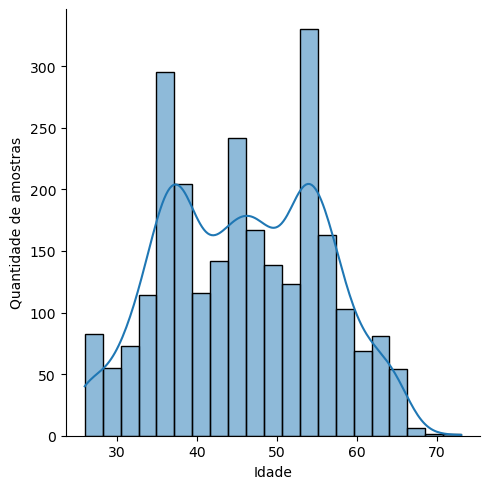

In [2]:
idade_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_idade.csv')
print(idade_df)
credito_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/credito8.csv')
grafico_dist_idade = sns.displot(credito_df.idade, kde = True);
grafico_dist_idade.set_titles('Amostras por idade');
grafico_dist_idade.set_axis_labels('Idade', 'Quantidade de amostras');


Resposta:

Varia de 26 a 73 anos. Observam-se duas concentrações por volta dos 55 (moda) e dos 35 anos.

### 1.1. Valor médio de transações por idade

**Há alguma influência na idade em relação à média da soma das transações dos clientes em 12 meses?** 

QUERY:
> SELECT idade, MIN(valor_transacoes) AS minimo_transacoes, AVG(valor_transacoes) AS media_transacoes, MAX(valor_transacoes) AS maximo_transacoes FROM credito GROUP BY (idade);

In [3]:
idade_transac_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-IDADExMED_TRANSACOES.csv')
idade_transac_df.dropna().sort_values(by='idade',ascending=True)


,idade,minimo_transacoes,media_transacoes,maximo_transacoes
43,26.0,869.43,2231.824407,3567.10
27,27.0,1662.33,2110.609091,2389.59
5,28.0,1813.90,2481.054615,3093.50
32,29.0,1608.51,2299.567083,3519.95
23,30.0,1284.94,2151.375161,3265.20
31,31.0,808.21,2286.053125,3264.52
19,32.0,695.31,2060.222439,2979.24
45,33.0,741.56,2242.237759,3448.47
4,34.0,1524.84,2184.586964,2966.57
13,35.0,715.56,2108.897882,3116.07


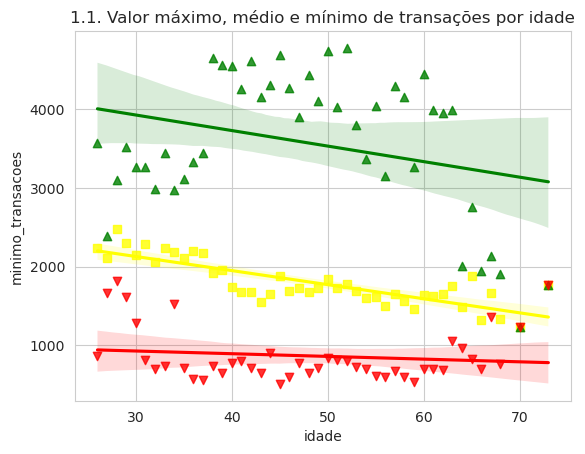

In [4]:
with sns.axes_style('whitegrid'):
    g = sns.regplot(idade_transac_df,
                   x = 'idade',
                   y = 'media_transacoes',
                   marker = 's',
                   color = 'yellow');
    sns.regplot(idade_transac_df,
               x = 'idade',
               y = 'maximo_transacoes',
               marker = '^',
               color = 'green');
    sns.regplot(idade_transac_df,
               x = 'idade',
               y = 'minimo_transacoes',
               marker = 'v',
               color = 'red');
    g.set_title('1.1. Valor máximo, médio e mínimo de transações por idade');


Resposta: 

Observa-se a diminuição gradativa do valor das transações, conforme a idade aumenta. Isso se aplica tanto nas médias, quanto nos mínimos e máximos.

### 1.2. Limite de cartão por idade

**Há alguma influência na idade em relação ao limite oferecido aos clientes?** 

QUERY:
> SELECT idade, MIN(limite_cartao) AS minimo_limite, AVG(limite_cartao) AS media_limite, MAX(limite_cartao) AS maximo_limite FROM credito GROUP BY (idade);

In [5]:
idade_limite_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-IDADExLIMITE.csv')
idade_limite_df.dropna().sort_values(by='idade',ascending=True)


,idade,minimo_limite,media_limite,maximo_limite
10,26.0,1438.40,3011.745763,10286.67
14,27.0,1553.57,4189.036364,11473.67
27,28.0,1707.86,8012.949231,25618.44
19,29.0,1438.77,6049.712917,23125.22
45,30.0,1512.58,6821.410645,26783.45
18,31.0,1438.19,6341.344062,34516.99
41,32.0,1438.14,8656.498049,34516.69
21,33.0,1438.18,8043.507241,34516.94
26,34.0,1438.18,8475.457857,34516.92
29,35.0,1438.69,8802.127882,34516.95


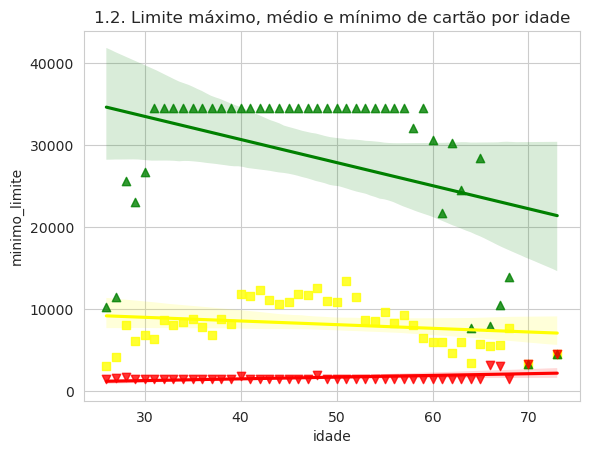

In [6]:
with sns.axes_style('whitegrid'):
    g = sns.regplot(idade_limite_df,
                   x = 'idade',
                   y = 'media_limite',
                   marker = 's',
                   color = 'yellow');
    sns.regplot(idade_limite_df,
               x = 'idade',
               y = 'maximo_limite',
               marker = '^',
               color='green');
    sns.regplot(idade_limite_df,
               x = 'idade',
               y = 'minimo_limite',
               marker = 'v',
               color ='red');
    g.set_title('1.2. Limite máximo, médio e mínimo de cartão por idade');


Resposta: 

Assim como na comparação com a categoria Média da soma das transações em 12 meses, o valor de limite oferecido tende a decair em idades mais avançadas. Entre 30 e 60 anos o limite oferecido é o máximo.

Porém, ainda que bastante discretamente, os limites mínimos oferecidos aumenta diretamente proporcional à idade aumenta.

### 1.3. Quantidade de produtos adquiridos por idade

**Há alguma influência na idade em relação à quantidade de produtos adquiridos?** 

QUERY:
>SELECT idade, MIN(qtd_produtos) AS minimo_quantidade_produtos, AVG(qtd_produtos) AS media_quantidade_produtos, MAX(qtd_produtos) AS maximo_quantidade_produtos FROM credito GROUP BY (idade);

In [7]:
idade_produtos_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-IDADExQTD_PRODUTOS.csv')
idade_produtos_df.dropna().sort_values(by='idade',ascending=True)


,idade,minimo_quantidade_produtos,media_quantidade_produtos,maximo_quantidade_produtos
39,26.0,1.0,4.559322,6.0
23,27.0,3.0,4.545455,6.0
19,28.0,3.0,4.230769,5.0
28,29.0,3.0,4.458333,6.0
45,30.0,3.0,4.354839,6.0
27,31.0,3.0,4.281250,6.0
41,32.0,1.0,4.439024,6.0
1,33.0,1.0,4.396552,6.0
18,34.0,3.0,4.142857,6.0
3,35.0,1.0,4.423529,6.0


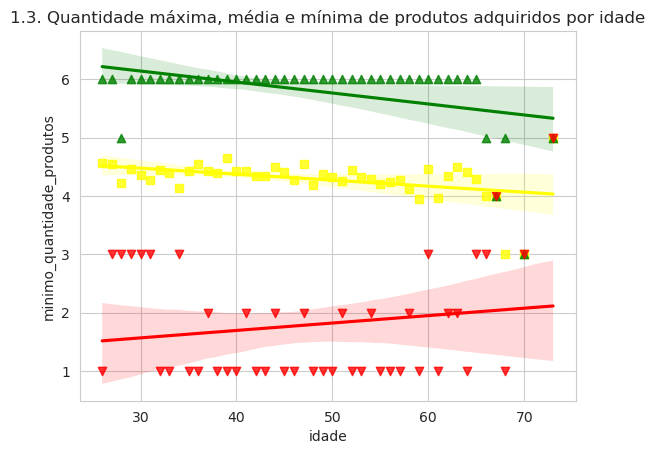

In [8]:
with sns.axes_style('whitegrid'):
    g = sns.regplot(idade_produtos_df,
                   x = 'idade',
                   y = 'media_quantidade_produtos',
                   marker = 's',
                   color = 'yellow');
    sns.regplot(idade_produtos_df,
               x = 'idade',
               y = 'maximo_quantidade_produtos',
               marker = '^',
               color = 'green');
    sns.regplot(idade_produtos_df,
               x = 'idade',
               y = 'minimo_quantidade_produtos',
               marker = 'v',
               color = 'red');
    g.set_title('1.3. Quantidade máxima, média e mínima de produtos adquiridos por idade');


Resposta: 

Praticamente não há variação média, mas observa-se que à medida que a idade aumenta tende a variar menos ao redor da média, aproximadamente 4,2 produtos adquiridos.

### 1.4. Quantidade de iterações por idade

**Há alguma influência na idade em relação à quantidade de iterações?** 

QUERY:
> SELECT idade, MIN(iteracoes_12m) AS minimo_iteracoes12m, AVG(iteracoes_12m) AS media_iteracoes12m, MAX(iteracoes_12m) AS maximo_iteracoes12m FROM credito GROUP BY (idade);

In [9]:
idade_iteracoes_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-IDADExQTD_ITERACOES.csv')
idade_iteracoes_df.dropna().sort_values(by='idade',ascending=True)


,idade,minimo_iteracoes12m,media_iteracoes12m,maximo_iteracoes12m
45,26.0,2.0,3.000000,4.0
11,27.0,2.0,2.727273,4.0
5,28.0,1.0,2.923077,5.0
16,29.0,2.0,3.041667,4.0
34,30.0,0.0,2.548387,5.0
15,31.0,0.0,2.593750,5.0
30,32.0,0.0,2.975610,5.0
7,33.0,0.0,2.896552,5.0
4,34.0,0.0,2.767857,4.0
18,35.0,0.0,2.752941,5.0


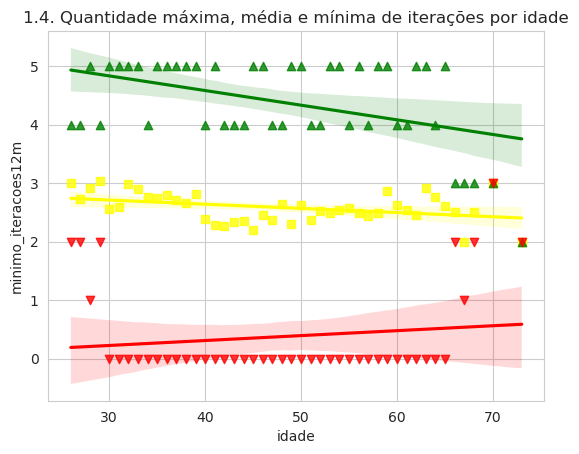

In [10]:
with sns.axes_style('whitegrid'):
    g = sns.regplot(idade_iteracoes_df,
                   x = 'idade',
                   y = 'media_iteracoes12m',
                   marker = 's',
                   color= 'yellow');
    sns.regplot(idade_iteracoes_df,
               x = 'idade',
               y = 'maximo_iteracoes12m',
               marker = '^',
               color = 'green');
    sns.regplot(idade_iteracoes_df,
               x = 'idade',
               y = 'minimo_iteracoes12m',
               marker = 'v',
               color = 'red');
    g.set_title('1.4. Quantidade máxima, média e mínima de iterações por idade');


Resposta: 

A quantidade de iterações por idade se comporta de forma semelhante à quantidade de produtos, sendo sua média por volta de 2,5 iterações, variando muito pouco em relação à idade dos clientes.

### 1.5. Quantidade de meses inativo por idade

**Há alguma influência na idade em relação à quantidade de meses inativo?** 

QUERY:
>SELECT idade, MIN(meses_inativo) AS minimo_meses_inativo, AVG(meses_inativo) AS media_meses_inativo, MAX(meses_inativo) AS maximo_meses_inativo FROM credito GROUP BY (idade);

In [11]:
idade_inatividade_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-IDADExMESES_INATIVO.csv')
idade_inatividade_df.dropna().sort_values(by='idade',ascending=True)


,idade,minimo_meses_inativo,media_meses_inativo,maximo_meses_inativo
45,26.0,0.0,2.271186,4.0
29,27.0,1.0,1.727273,3.0
5,28.0,1.0,2.230769,3.0
34,29.0,1.0,2.333333,4.0
23,30.0,1.0,2.290323,6.0
33,31.0,1.0,2.125000,3.0
19,32.0,1.0,2.268293,3.0
25,33.0,1.0,2.120690,4.0
4,34.0,1.0,2.392857,6.0
7,35.0,1.0,2.235294,6.0


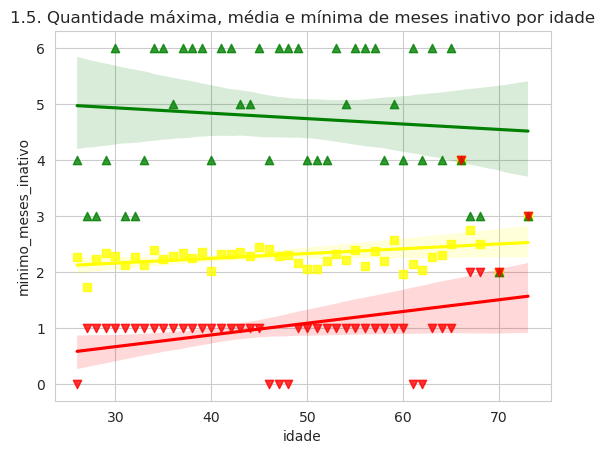

In [12]:
with sns.axes_style('whitegrid'):
    g = sns.regplot(idade_inatividade_df,
                   x = 'idade',
                   y = 'media_meses_inativo',
                   marker = 's',
                   color = 'yellow');
    sns.regplot(idade_inatividade_df,
               x = 'idade',
               y = 'maximo_meses_inativo',
               marker = '^',
               color = 'green');
    sns.regplot(idade_inatividade_df,
               x = 'idade',
               y = 'minimo_meses_inativo',
               marker = 'v',
               color = 'red');
    g.set_title('1.5. Quantidade máxima, média e mínima de meses inativo por idade');


Resposta: 

Os clientes a partir de 60 anos tendem a ficar mais tempo inativos.

### 1.6. Idade por quantidade de transações nos últimos 12 meses

**Há alguma influência na idade em relação à quantidade de transação nos últimos 12 meses?** 

QUERY:
>SELECT idade, MIN(qtd_transacoes_12m) AS minimo_quantidade_transacoes, AVG(qtd_transacoes_12m) AS media_quantidade_transacoes, MAX(qtd_transacoes_12m) AS maximo_quantidade_transacoes FROM credito GROUP BY (idade);


In [13]:
idade_transacoes12m_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-IDADExQTD_TRANSACOES12M.csv')
idade_transacoes12m_df.dropna().sort_values(by='idade',ascending=True)


,idade,minimo_quantidade_transacoes,media_quantidade_transacoes,maximo_quantidade_transacoes
16,26.0,20.0,45.237288,89.0
3,27.0,31.0,43.000000,61.0
45,28.0,31.0,63.615385,87.0
21,29.0,30.0,54.458333,80.0
39,30.0,24.0,50.000000,88.0
20,31.0,30.0,54.625000,83.0
35,32.0,10.0,47.829268,71.0
5,33.0,10.0,53.551724,103.0
44,34.0,31.0,49.410714,75.0
29,35.0,15.0,49.917647,80.0


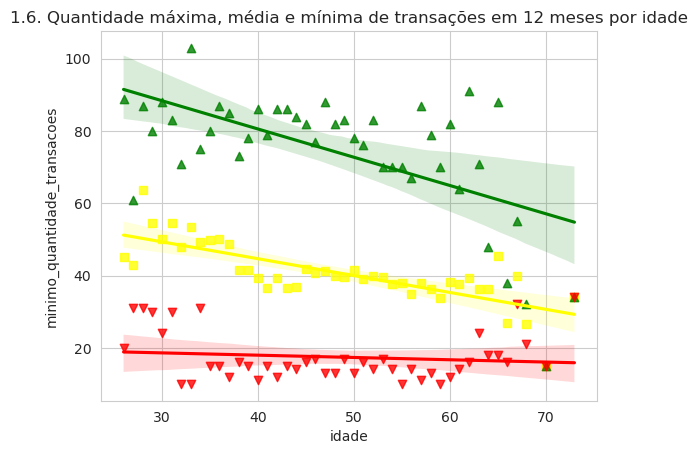

In [14]:
with sns.axes_style('whitegrid'):
    g = sns.regplot(idade_transacoes12m_df,
                   x = 'idade',
                   y = 'media_quantidade_transacoes',
                   marker = 's',
                   color = 'yellow');
    sns.regplot(idade_transacoes12m_df,
               x = 'idade',
               y = 'maximo_quantidade_transacoes',
               marker = '^',
               color = 'green');
    sns.regplot(idade_transacoes12m_df,
               x = 'idade',
               y = 'minimo_quantidade_transacoes',
               marker = 'v',
               color ='red');
    g.set_title('1.6. Quantidade máxima, média e mínima de transações em 12 meses por idade');


Resposta:

Para fechar o ciclo de análise da idade, a queda da quantidade de transações em idades mais avançadas converge com o que foi observado anteriormente. 

Portanto, menores valores médios de transação, limites, quantidade de iterações, associado a mais meses inativos são esperados.


## 2. Gênero

Agora exploraremos a segunda categoria.

**Quantas amostras de cada gênero temos no conjunto de dados?**

QUERY: 
> SELECT sexo, COUNT(sexo) FROM credito;

In [15]:
sexo_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_sexo.csv')
sexo_df = sexo_df.rename({'_col1': 'Amostras'}, axis = 1)
sexo_df


,sexo,Amostras
0,M,1563
1,F,1001


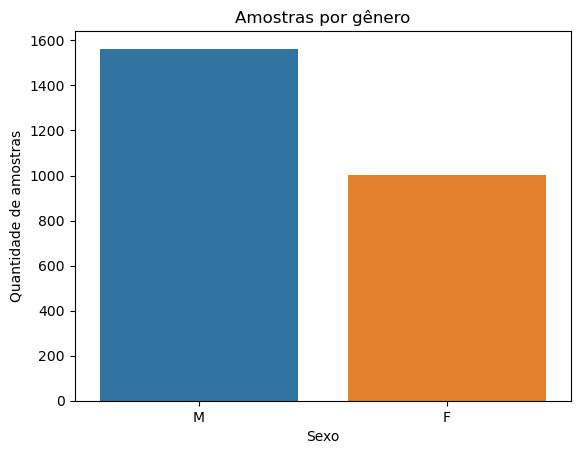

In [16]:
grafico_sexo = sns.barplot(data = sexo_df, x = 'sexo', y = 'Amostras');
grafico_sexo.set_title('Amostras por gênero');
grafico_sexo.set_xlabel('Sexo');
grafico_sexo.set_ylabel('Quantidade de amostras');


Resposta:

Vemos inicialmente que há cerca de 50% de amostras do sexo masculino em relação ao feminino, contudo, ainda há uma quantidade relevante de ambos os gêneros.

Assim como na variável `idade`, avaliaremos os dois gêneros em relação às variáveis.

### 2.1. Média de transações nos últimos 12 meses por gênero

**Há alguma influência no gênero em relação à média de transações nos últimos 12 meses?** 

QUERY:
>SELECT sexo, MIN(valor_transacoes) AS minimo_transacoes, AVG(valor_transacoes) AS media_transacoes, MAX(valor_transacoes) AS maximo_transacoes FROM credito GROUP BY (sexo);


In [17]:
sexo_transac_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-SEXOxMED_TRANSACOES.csv')
sexo_transac_df.dropna()


,sexo,minimo_transacoes,media_transacoes,maximo_transacoes
0,F,510.16,1840.170680,4776.58
2,M,530.36,1808.341685,4686.93


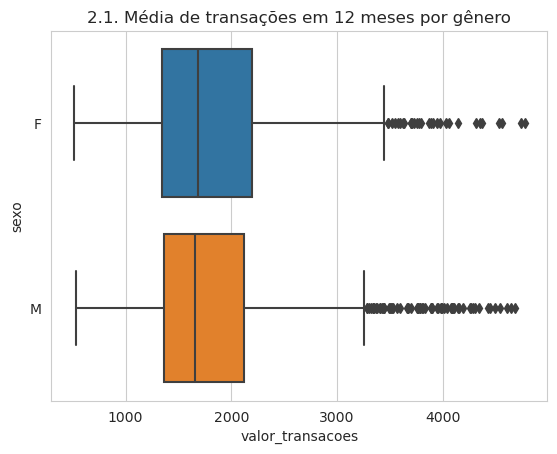

In [18]:
with sns.axes_style('whitegrid'):    
    g = sns.boxplot(credito_df,
           x = 'valor_transacoes',
           y = 'sexo');
    g.set_title('2.1. Média de transações em 12 meses por gênero')


Resposta: 

A média de transação em 12 meses das mulheres é levemente maior que o dos homens, assim como sua distribuição no geral.

### 2.2. Limite de cartão por gênero

**Há diferença na disponibilização de limite de crédito por sexo?**

QUERY:
> SELECT sexo, MIN(limite_cartao) AS minimo_limite, AVG(limite_cartao) AS media_limite, MAX(limite_cartao) AS maximo_limite FROM credito GROUP BY (sexo);

In [19]:
analise1 = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_limite_cartao_por_sexo.csv')
analise1['media_limite'] = np.round(analise1['media_limite'],2)
analise1.sort_values(by = 'maximo_limite', ascending = False)


,sexo,minimo_limite,media_limite,maximo_limite
0,M,1438.07,11201.36,34516.99
1,F,1438.03,5748.98,34516.99


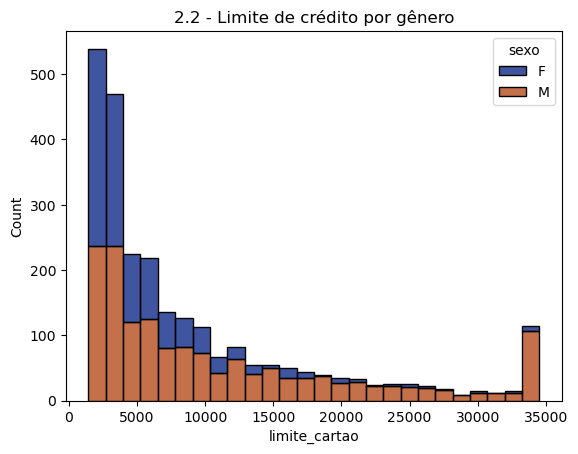

In [20]:
grafico1 = sns.histplot(x = credito_df.limite_cartao, 
             hue = credito_df.sexo, 
             palette = 'dark', 
             multiple = 'stack');
grafico1.set_title('2.2 - Limite de crédito por gênero');


Resposta:

Os valores mínimos em máximos de limite de crédito disponibilizados são praticamente os mesmos, porém, observa-se a grande diferença das média entre os gêneros. Os homens possuem em média mais que o dobro que as mulheres.

Conforme o gráfico 2.2, a maior distribuição de limite de crédito para mulheres estão abaixo da média.


### 2.3. Quantidade de produtos adquiridos por gênero

**Há alguma influência no gênero do cliente em relação à quantidade de produtos adquiridos?** 

QUERY:
> SELECT sexo, MIN(qtd_produtos) AS minimo_quantidade_produtos, AVG(qtd_produtos) AS media_quantidade_produtos, MAX(qtd_produtos) AS maximo_quantidade_produtos FROM credito GROUP BY (sexo);

In [21]:
sexo_produtos_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-SEXOxQTD_PRODUTOS.csv')
sexo_produtos_df.dropna()

,sexo,minimo_quantidade_produtos,media_quantidade_produtos,maximo_quantidade_produtos
0,F,1.0,4.388000,6.0
2,M,1.0,4.335682,6.0


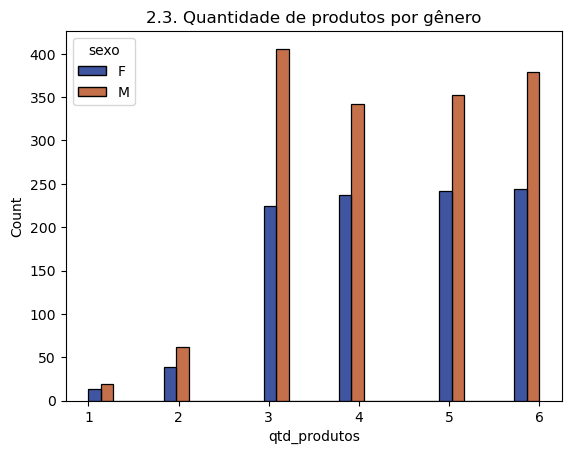

In [22]:
g = sns.histplot(x = credito_df.qtd_produtos, 
                hue = credito_df.sexo, 
                palette = 'dark', 
                multiple = 'dodge');
g.set_title('2.3. Quantidade de produtos por gênero');

Resposta: 

Não se consegue distinguir comportamentos entre os gêneros em relação à quantidade de produtos, pois eles se distribuem de forma muito similar nos dados obtidos.

### 2.4. Quantidade de iterações por gênero

**Há alguma influência no gênero em relação à quantidade de iterações?** 

QUERY:
>SELECT sexo, MIN(iteracoes_12m) AS minimo_iteracoes12m, AVG(iteracoes_12m) AS media_iteracoes12m, MAX(iteracoes_12m) AS maximo_iteracoes12m FROM credito GROUP BY (sexo);

In [23]:
sexo_iteracoes_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-SEXOxQTD_ITERACOES.csv')
sexo_iteracoes_df.dropna().sort_values(by='sexo',ascending=True)


,sexo,minimo_iteracoes12m,media_iteracoes12m,maximo_iteracoes12m
0,F,0.0,2.570000,5.0
2,M,0.0,2.571429,5.0


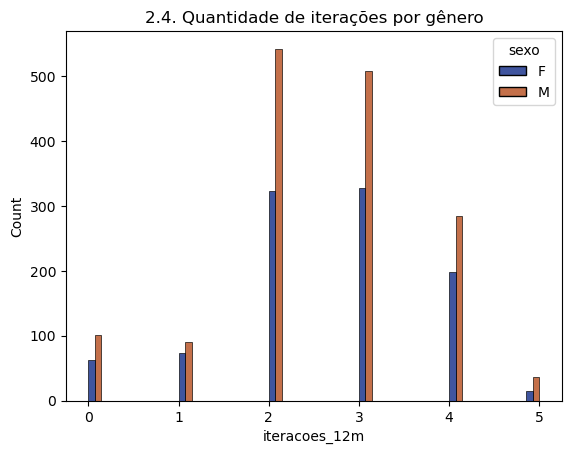

In [24]:
g = sns.histplot(x = credito_df.iteracoes_12m, 
                hue = credito_df.sexo, 
                palette = 'dark', 
                multiple = 'dodge');
g.set_title('2.4. Quantidade de iterações por gênero');


Resposta: 

Da mesma forma que a análise anteriores, não é possível fazer inferências de comportamento por gênero. 

### 2.5. Quantidade de meses inativo por gênero

**Há alguma influência no gênero em relação à quantidade de meses inativo?** 

QUERY:
>SELECT sexo, MIN(meses_inativo) AS minimo_meses_inativo, AVG(meses_inativo) AS media_meses_inativo, MAX(meses_inativo) AS maximo_meses_inativo FROM credito GROUP BY (sexo);

In [25]:
sexo_inatividade_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-SEXOxMESES_INATIVO.csv')
sexo_iteracoes_df.dropna().sort_values(by='sexo',ascending=True)


,sexo,minimo_iteracoes12m,media_iteracoes12m,maximo_iteracoes12m
0,F,0.0,2.570000,5.0
2,M,0.0,2.571429,5.0


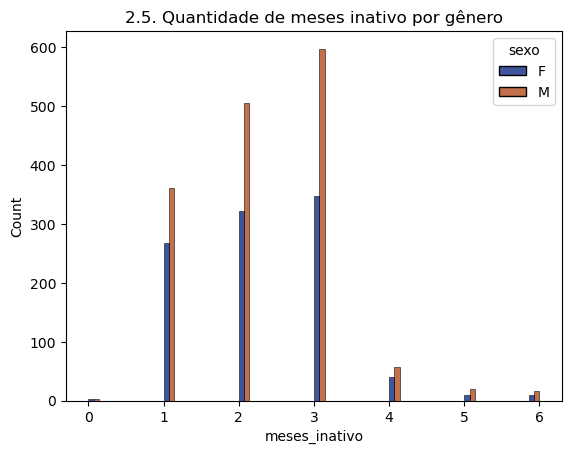

In [26]:
g = sns.histplot(x = credito_df.meses_inativo, 
                hue = credito_df.sexo, 
                palette = 'dark', 
                multiple = 'dodge');
g.set_title('2.5. Quantidade de meses inativo por gênero');

Resposta:

Mais uma vez, houve semelhanças nos padrões de proporcionalidade entre os gêneros.

### 2.6. Quantidade de transações nos últimos 12 meses por gênero

**Há alguma influência nogênero em relação à quantidade de transação nos últimos 12 meses?** 

QUERY:
> SELECT sexo,
MIN(qtd_transacoes_12m) AS minimo_quantidade_transacoes, AVG(qtd_transacoes_12m) AS media_quantidade_transacoes, MAX(qtd_transacoes_12m) AS maximo_quantidade_transacoes FROM credito GROUP BY (sexo);

In [27]:
sexo_transac12m_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-SEXOxQTD_TRANSACOES12M.csv')
sexo_transac12m_df.dropna().sort_values(by='sexo',ascending=True)


,sexo,minimo_quantidade_transacoes,media_quantidade_transacoes,maximo_quantidade_transacoes
0,F,12.0,42.293000,103.0
2,M,10.0,41.346573,89.0


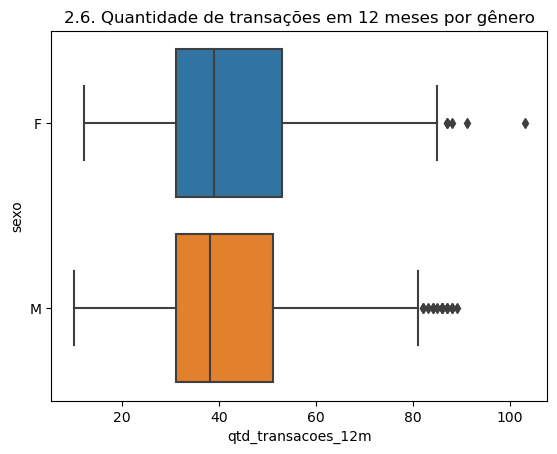

In [28]:
g = sns.boxplot(x = credito_df.qtd_transacoes_12m, 
                y = credito_df.sexo);
g.set_title('2.6. Quantidade de transações em 12 meses por gênero');

Resposta:

Mais uma vez, a variável `qtd_transacoes_12m` possui confluência com a `valor_transacoes`. É de se esperar que quanto mais transações se realiza, maior será a soma da média de transações em 12 meses.

## 3. Estado civil

Passamos então para a terceira variável categórica.

**Quantas amostras de cada estado civil existem na amostra?**

QUERY: 
> SELECT estado_civil, COUNT(estado_civil) FROM credito;


In [29]:
estadocivil_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_estado_civil.csv')
estadocivil_df = estadocivil_df.rename({'_col1': 'Amostras'}, axis = 1)
print(f'Quantidade de amostras: {estadocivil_df.Amostras.sum()}')
estadocivil_df


Quantidade de amostras: 2564


,estado_civil,Amostras
0,solteiro,766
1,na,116
2,divorciado,161
3,casado,1521


In [30]:
estadocivil_df = estadocivil_df[estadocivil_df != 'na'].dropna()
print(f'Quantidade de amostras sem "na": {estadocivil_df.Amostras.sum()}')
estadocivil_df


Quantidade de amostras sem "na": 2448


,estado_civil,Amostras
0,solteiro,766
2,divorciado,161
3,casado,1521


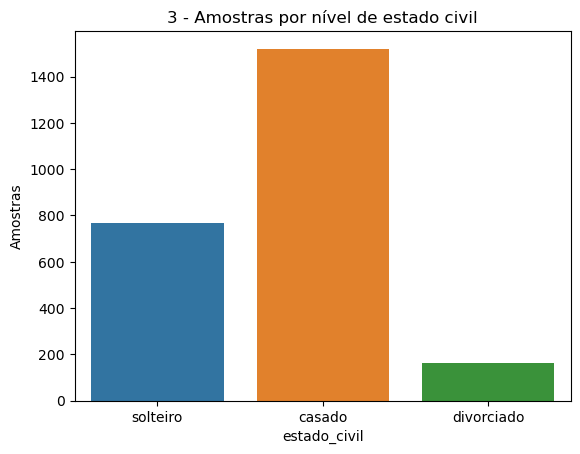

In [31]:
grafico_estadocivil = sns.barplot(data = estadocivil_df, 
                                   x = 'estado_civil', 
                                   y = 'Amostras',
                                  order = ['solteiro','casado','divorciado']);
grafico_estadocivil.set_title('3 - Amostras por nível de estado civil');


Resposta:

Observamos a quantidade bem maior de clientes casados, inclusive sendo mais de 50% que o total de amostras.

Há presença de amostras sem informação "na", portanto faz-se necessário tratar os dados antes de plotar os gráficos.

Em seguida realizaremos análises semelhantes acerca do estado civil.

### 3.1. Média de transações nos últimos 12 meses por estado civil

**Há alguma influência no estado civil em relação à média de transações nos últimos 12 meses?**

QUERY:
>SELECT estado_civil, MIN(valor_transacoes) AS minimo_transacoes, AVG(valor_transacoes) AS media_transacoes, MAX(valor_transacoes) AS maximo_transacoes FROM credito GROUP BY (estado_civil);

In [32]:
estado_civil_transac_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-ESTADO_CIVILxMED_TRANSACOES.csv')
estado_civil_transac_df = estado_civil_transac_df.query('estado_civil != "na"').dropna()

estado_civil_transac_df


,estado_civil,minimo_transacoes,media_transacoes,maximo_transacoes
0,divorciado,781.27,1987.560683,4605.89
3,solteiro,530.36,2002.385007,4776.58
4,casado,510.16,1717.345444,4740.94


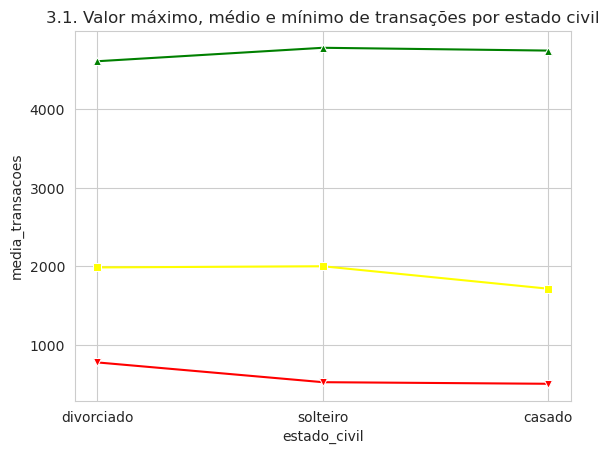

In [33]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(estado_civil_transac_df,
                   x = 'estado_civil',
                   y = 'media_transacoes',
                   color = 'yellow',
                    marker = 's');
    sns.lineplot(estado_civil_transac_df,
               x = 'estado_civil',
               y = 'maximo_transacoes',
               color = 'green',
                marker = '^');
    sns.lineplot(estado_civil_transac_df,
               x = 'estado_civil',
               y = 'minimo_transacoes',
               color = 'red',
                marker = 'v');
    g.set_title('3.1. Valor máximo, médio e mínimo de transações por estado civil');


Resposta:

As pessoas casadas da amostra possuem médias de transações visivelmente menores em relação aos solteiros e aos divorciados.

As amostras divorciadas possuem menores variações de máximos e mínimos, possivelmente devido à sua quantidade reduzida.

### 3.2 - Limite por estado civil

**Há diferença na disponibilização de limite de crédito por sexo?**

QUERY:
> SELECT sexo, MIN(limite_cartao) AS minimo_limite, AVG(limite_cartao) AS media_limite, MAX(limite_cartao) AS maximo_limite FROM credito GROUP BY (sexo);

In [34]:
estado_civil_limite_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-ESTADO_CIVILxLIMITE.csv')
estado_civil_limite_df = estado_civil_limite_df.query('estado_civil != "na"').dropna()
estado_civil_limite_df

,estado_civil,minimo_limite,media_limite,maximo_limite
0,solteiro,1438.14,10200.690327,34516.99
2,casado,1438.03,8143.801626,34516.96
3,divorciado,1438.34,10485.895031,34516.99


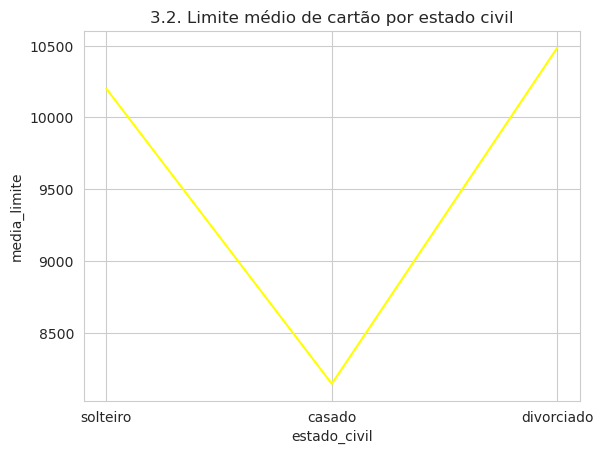

In [35]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(estado_civil_limite_df,
                   x = 'estado_civil',
                   y = 'media_limite',
                   color = 'yellow');
 
    g.set_title('3.2. Limite médio de cartão por estado civil');


Resposta: 

Considerando que os valores máximos e mínimos na tabela são praticamente idênticos, conforme a tabela, decidiu-se plotar apenas a média para evidenciar as diferenças entre os estados civis.

Assim como a categoria anterior, os casados se distanciam dos outros estados civis com menores valores de limite de cartão.

### 3.3. Quantidade de produtos adquiridos por estado civil

**Há alguma influência no estado civil do cliente em relação à quantidade de produtos adquiridos?** 

QUERY:
>SELECT estado_civil, MIN(qtd_produtos) AS minimo_quantidade_produtos, AVG(qtd_produtos) AS media_quantidade_produtos, MAX(qtd_produtos) AS maximo_quantidade_produtos FROM credito GROUP BY (estado_civil);

In [36]:
estado_civil_produtos_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-ESTADO_CIVILxQTD_PRODUTOS.csv')
estado_civil_produtos_df = estado_civil_produtos_df.query('estado_civil != "na"').dropna()
estado_civil_produtos_df


,estado_civil,minimo_quantidade_produtos,media_quantidade_produtos,maximo_quantidade_produtos
0,solteiro,1.0,4.428758,6.0
2,casado,1.0,4.314022,6.0
3,divorciado,1.0,4.372671,6.0


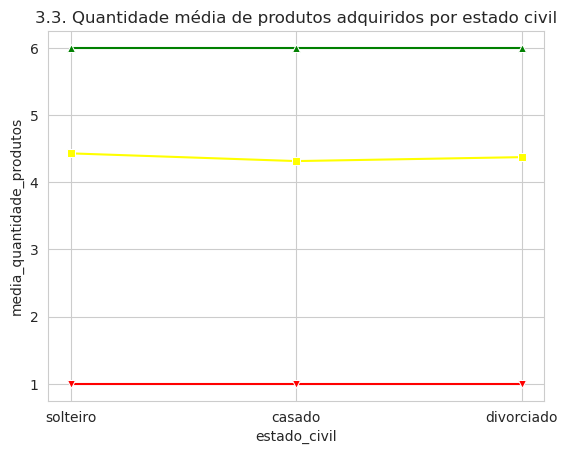

In [37]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(estado_civil_produtos_df,
                   x = 'estado_civil',
                   y = 'media_quantidade_produtos',
                   color = 'yellow',
                    marker = 's');
    sns.lineplot(estado_civil_produtos_df,
                   x = 'estado_civil',
                   y = 'maximo_quantidade_produtos',
                   color = 'green',
                    marker = '^');
    sns.lineplot(estado_civil_produtos_df,
                   x = 'estado_civil',
                   y = 'minimo_quantidade_produtos',
                   color = 'red',
                    marker = 'v');
    g.set_title('3.3. Quantidade média de produtos adquiridos por estado civil');


Resposta:

Apesar de haver variações, não há diferença significativa entre os estados civil a nível de quantidade de produtos adquiridos.

### 3.4. Quantidade de iterações por estado civil

**Há alguma influência no estado civil em relação à quantidade de iterações?** 

QUERY:
>SELECT estado_civil, MIN(iteracoes_12m) AS minimo_iteracoes12m, AVG(iteracoes_12m) AS media_iteracoes12m, MAX(iteracoes_12m) AS maximo_iteracoes12m FROM credito GROUP BY (estado_civil);

In [38]:
estado_civil_iteracoes_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-ESTADO_CIVILxQTD_ITERACOES.csv')
estado_civil_iteracoes_df = estado_civil_iteracoes_df.query('estado_civil != "na"').dropna()
estado_civil_iteracoes_df

,estado_civil,minimo_iteracoes12m,media_iteracoes12m,maximo_iteracoes12m
0,casado,0.0,2.610270,5.0
1,divorciado,0.0,2.478261,5.0
3,solteiro,0.0,2.539869,5.0


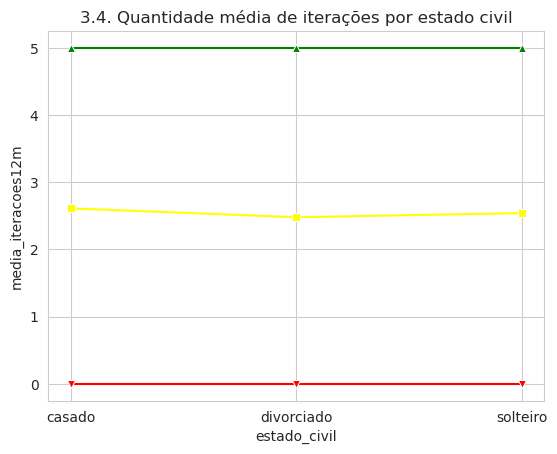

In [39]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(estado_civil_iteracoes_df,
                   x = 'estado_civil',
                   y = 'media_iteracoes12m',
                   color = 'yellow',
                   marker = 's');
    sns.lineplot(estado_civil_iteracoes_df,
                   x = 'estado_civil',
                   y = 'maximo_iteracoes12m',
                   color = 'green',
                   marker = '^');
    sns.lineplot(estado_civil_iteracoes_df,
                   x = 'estado_civil',
                   y = 'minimo_iteracoes12m',
                   color = 'red',
                   marker = 'v');
    g.set_title('3.4. Quantidade média de iterações por estado civil');


Resposta:

Existe diferença entre os estados civis, mas a diferença é pouco sensível para ser rrelevante mais uma vez.

### 3.5. Quantidade de meses inativo por estado civil

**Há alguma influência no estado civil em relação à quantidade de meses inativo?** 

QUERY:
>SELECT estado_civil, MIN(meses_inativo) AS minimo_meses_inativo, AVG(meses_inativo) AS media_meses_inativo, MAX(meses_inativo) AS maximo_meses_inativo FROM credito GROUP BY (estado_civil); 

In [40]:
estado_civil_inativo_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-ESTADO_CIVILxMESES_INATIVO.csv')
estado_civil_inativo_df = estado_civil_inativo_df.query('estado_civil != "na"').dropna()
estado_civil_inativo_df


,estado_civil,minimo_meses_inativo,media_meses_inativo,maximo_meses_inativo
0,casado,0.0,2.273864,6.0
1,divorciado,1.0,2.316770,6.0
3,solteiro,0.0,2.266667,6.0


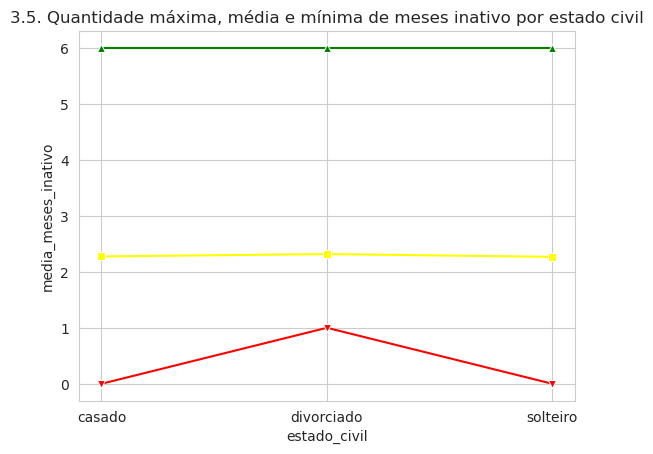

In [41]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(estado_civil_inativo_df,
                   x = 'estado_civil',
                   y = 'media_meses_inativo',
                   color = 'yellow',
                    marker = 's');
    sns.lineplot(estado_civil_inativo_df,
               x = 'estado_civil',
               y = 'maximo_meses_inativo',
               color = 'green',
                marker = '^');
    sns.lineplot(estado_civil_inativo_df,
               x = 'estado_civil',
               y = 'minimo_meses_inativo',
               color = 'red',
                marker = 'v');
    g.set_title('3.5. Quantidade máxima, média e mínima de meses inativo por estado civil');


Resposta:

Correndo o risco de ser redundante, mas faz-se necessário registrar novamente que, assim como as duas categorias anteriores, praticamente não há diferença entre os estados civis.

### 3.6. Quantidade de transações nos últimos 12 meses por estado civil

**Há alguma influência no estado civil em relação à quantidade de transação nos últimos 12 meses?** 

QUERY:
> SELECT estado_civil, MIN(qtd_transacoes_12m) AS minimo_quantidade_transacoes, AVG(qtd_transacoes_12m) AS media_quantidade_transacoes, MAX(qtd_transacoes_12m) AS maximo_quantidade_transacoes FROM credito GROUP BY (estado_civil);

In [42]:
estado_civil_qtdtransacoes_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-ESTADO_CIVILxQTD_TRANSACOES12M.csv')
estado_civil_qtdtransacoes_df = estado_civil_qtdtransacoes_df.query('estado_civil != "na"').dropna()
estado_civil_qtdtransacoes_df


,estado_civil,minimo_quantidade_transacoes,media_quantidade_transacoes,maximo_quantidade_transacoes
0,casado,10.0,38.836735,86.0
1,divorciado,20.0,47.198758,103.0
3,solteiro,10.0,46.737255,91.0


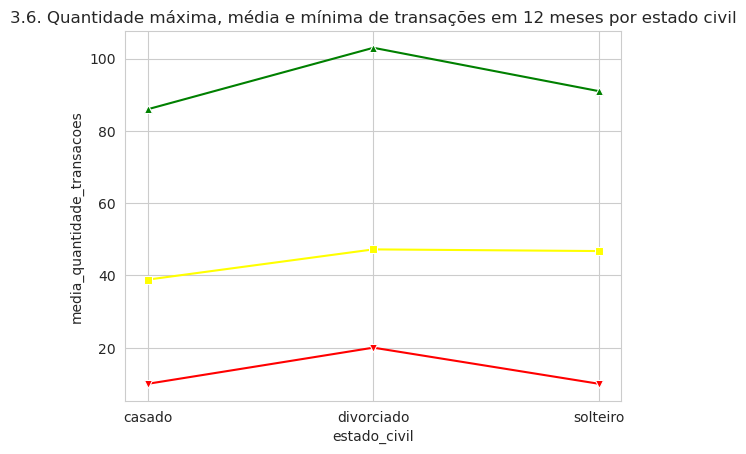

In [43]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(estado_civil_qtdtransacoes_df,
                   x = 'estado_civil',
                   y = 'media_quantidade_transacoes',
                   color = 'yellow',
                    marker = 's');
    sns.lineplot(estado_civil_qtdtransacoes_df,
               x = 'estado_civil',
               y = 'maximo_quantidade_transacoes',
               color = 'green',
                marker = '^');
    sns.lineplot(estado_civil_qtdtransacoes_df,
               x = 'estado_civil',
               y = 'minimo_quantidade_transacoes',
               color = 'red',
                marker = 'v');
    g.set_title('3.6. Quantidade máxima, média e mínima de transações em 12 meses por estado civil');


Resposta:

O mesmo padrão de `idade` e `sexo` ocorreu com `estado_civil`, o conjunto que possui maiores valores médios de transação possuem maiores quantidade de transações em 12 meses.

## 4. Dependentes

**Como se distribuem as amostras em relação à quantidade de dependentes?**

QUERY: 
> SELECT dependentes, COUNT(dependentes) FROM credito;

In [44]:
dependentes_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_dependentes.csv')
dependentes_df = dependentes_df.rename({'_col1': 'Amostras', 'dependentes': "Qtde_dependentes" }, axis = 1)
dependentes_df


,Qtde_dependentes,Amostras
0,1,545
1,5,66
2,4,324
3,3,612
4,2,680
5,0,337


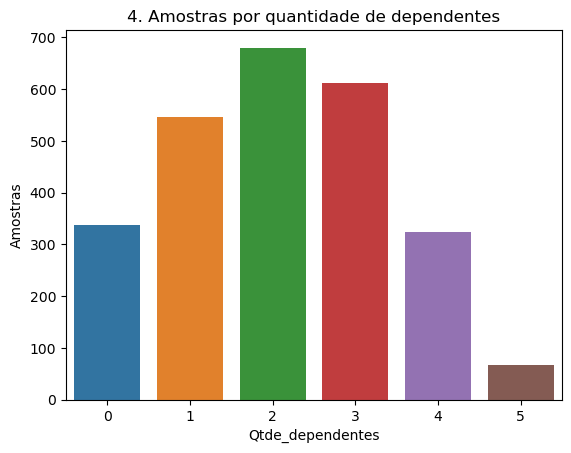

In [45]:
grafico_dependentes = sns.barplot(data = dependentes_df, x = 'Qtde_dependentes', y = 'Amostras');
grafico_dependentes.set_title('4. Amostras por quantidade de dependentes');


Resposta:

Observa-se que os clientes com 2 dependentes estão em maior quantidade em uma distribuição normal, enquanto os com 5 dependentes como os de menor quantidade.

À frente, observaremos se esta variável se comporta em relação às variáveis numéricas a seguir.

### 4.1. Média de transações nos últimos 12 meses por quantidade de dependentes

**Há alguma influência na quantidade de dependentes em relação à média de transações nos últimos 12 meses?**

QUERY:
>SELECT dependentes, MIN(valor_transacoes) AS minimo_transacoes, AVG(valor_transacoes) AS media_transacoes, MAX(valor_transacoes) AS maximo_transacoes FROM credito GROUP BY (dependentes);

In [46]:
dependentes_transac_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-DEPENDENTESxMED_TRANSACOES.csv')
dependentes_transac_df = dependentes_transac_df.query('dependentes != "na"').dropna()
dependentes_transac_df


,dependentes,minimo_transacoes,media_transacoes,maximo_transacoes
1,2.0,510.16,1804.929926,4642.78
2,0.0,687.81,1936.566142,4563.50
3,4.0,615.02,1768.545833,4686.93
4,5.0,597.86,1604.522462,3210.46
5,3.0,563.93,1798.072344,4776.58
6,1.0,530.36,1851.174257,4740.94


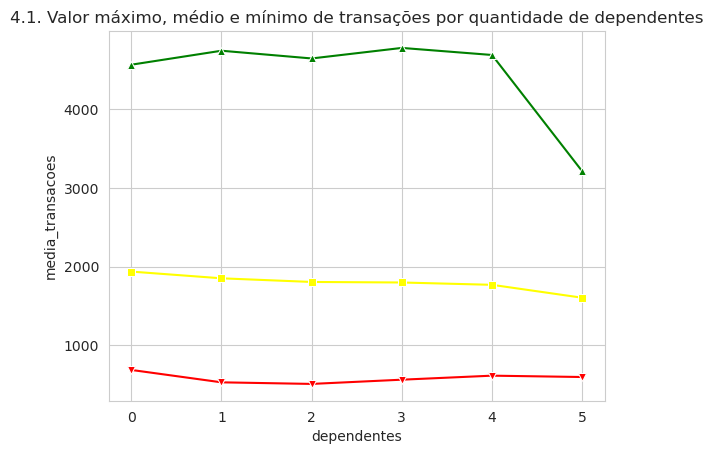

In [47]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(dependentes_transac_df,
                   x = 'dependentes',
                   y = 'media_transacoes',
                   color = 'yellow',
                    marker = 's');
    sns.lineplot(dependentes_transac_df,
               x = 'dependentes',
               y = 'maximo_transacoes',
               color = 'green',
                    marker = '^');
    sns.lineplot(dependentes_transac_df,
               x = 'dependentes',
               y = 'minimo_transacoes',
               color = 'red',
                    marker = 'v');
    g.set_title('4.1. Valor máximo, médio e mínimo de transações por quantidade de dependentes');


Resposta: 

Observa-se o decréscimo contínuo de valor de transações conforme aumenta a quantidade de dependentes.

### 4.2. Limite por quantidade de dependentes

**Há diferença na disponibilização de limite de crédito por quantidade de dependentes?**

QUERY:
> SELECT dependentes, MIN(limite_cartao) AS minimo_limite, AVG(limite_cartao) AS media_limite, MAX(limite_cartao) AS maximo_limite FROM credito GROUP BY (dependentes);

In [48]:
dependentes_limite_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-DEPENDENTESxLIMITE.csv')
dependentes_limite_df = dependentes_limite_df.query('dependentes != "na"').dropna()
dependentes_limite_df


,dependentes,minimo_limite,media_limite,maximo_limite
0,1.0,1438.08,8423.548385,34516.99
2,2.0,1438.10,9142.764676,34516.99
3,0.0,1438.03,5858.271899,34516.95
4,3.0,1438.25,9870.866672,34516.96
5,4.0,1438.61,11471.083796,34516.98
6,5.0,1438.25,11047.330769,34516.96


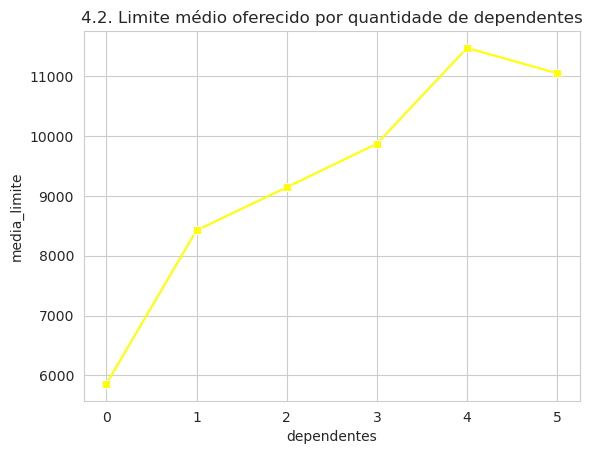

In [49]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(dependentes_limite_df,
                   x = 'dependentes',
                   y = 'media_limite',
                   color = 'yellow',
                    marker = 's');
    
    g.set_title('4.2. Limite médio oferecido por quantidade de dependentes');


Resposta:

Optou-se por retirar os valores máximos e mínimos, visto que são constantes em todos os valores.

Conforme se evidencia no gráfico, o limite aumenta conforme a quantidade de dependentes. Uma das justificativas seria que a renda familiar aumenta com mais pessoas contribuindo, dando à instituição mais segurança para fornecer maiores limites, ainda que a média da soma de transações seja menor que os clientes com menos dependentes.

Observa-se que o limite é uma variável que é sempre relevante em relação às categóricas, permitindo avaliar correlação direta ou inversamente proporcional, ou seja, nunca é um valor constante.

Em seguida, realizou-se mais uma avaliação dos dependentes quanto ao limite oferecido pela insttuição, mas adicionando o fator `salario_anual` para avaliar se há relevância no entendimento.

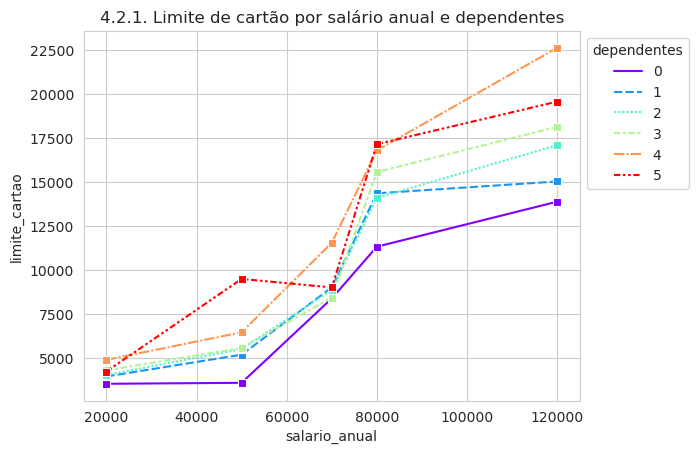

In [50]:
df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/credito8.csv')
df = df.query('salario_anual != "na"') # retira resultados 'na'

df['salario_anual'] = np.select([df.salario_anual.str.contains('menos'), #20.000
                                     df.salario_anual.str.contains('40K '),    #50.000
                                     df.salario_anual.str.contains('60K '),    #70.000
                                     df.salario_anual.str.contains('80K '),    #100.000
                                     (df['salario_anual'] == '$120K +')],        #120.000
                                     [20000, 50000, 70000, 80000, 120000])

with sns.axes_style('whitegrid'):
    g = sns.lineplot(data = df,
                     y = df.limite_cartao,
                     style = df.dependentes,   
                     hue = df.dependentes,   
                     x = df.salario_anual,
                    palette = 'rainbow',
                    err_style = None,
                    marker = 's');

    sns.move_legend(g,loc ='upper left', bbox_to_anchor = (1,1))

    g.set_title('4.2.1. Limite de cartão por salário anual e dependentes');


Denota-se que tanto o `salario_anual` quanto `dependentes` influenciam diretamente no limite oferecido. Da mesma forma, quanto maior a quantidade de dependentes, maior o salário anual.

### 4.3. Quantidade de produtos adquiridos por quantidade de dependentes

**Há alguma influência na quantidade de dependentes do cliente em relação à quantidade de produtos adquiridos?** 

QUERY:
>SELECT dependentes, MIN(qtd_produtos) AS minimo_quantidade_produtos, AVG(qtd_produtos) AS media_quantidade_produtos, MAX(qtd_produtos) AS maximo_quantidade_produtos FROM credito GROUP BY (dependentes);

In [51]:
dependentes_qtdprodutos_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-DEPENDENTESxQTD_PRODUTOS.csv')
dependentes_qtdprodutos_df = dependentes_qtdprodutos_df.query('dependentes != "na"').dropna()
dependentes_qtdprodutos_df


,dependentes,minimo_quantidade_produtos,media_quantidade_produtos,maximo_quantidade_produtos
1,2.0,1.0,4.317647,6.0
2,0.0,1.0,4.370920,6.0
3,1.0,1.0,4.365138,6.0
4,4.0,1.0,4.416667,6.0
5,5.0,1.0,4.246154,6.0
6,3.0,1.0,4.362295,6.0


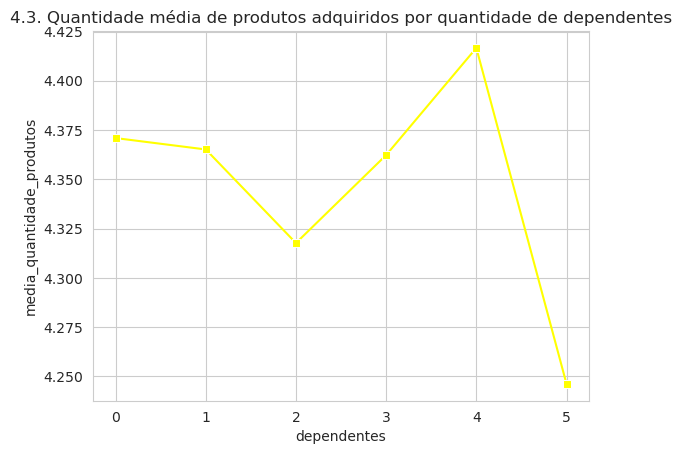

In [52]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(dependentes_qtdprodutos_df,
                   x = 'dependentes',
                   y = 'media_quantidade_produtos',
                   color = 'yellow',
                    marker = 's');

    g.set_title('4.3. Quantidade média de produtos adquiridos por quantidade de dependentes');


Resposta:

Observa-se que não há direção definida com relação à quantidade de produtos adquiridos quando se aumenta a quantidade de dependentes.

### 4.4. Quantidade de iterações por quantidade de dependentes

**Há alguma influência na quantidade de dependentes em relação à quantidade de iterações?** 

QUERY:
>SELECT dependentes, MIN(iteracoes_12m) AS minimo_iteracoes12m, AVG(iteracoes_12m) AS media_iteracoes12m, MAX(iteracoes_12m) AS maximo_iteracoes12m FROM credito GROUP BY (dependentes);

In [53]:
dependentes_iteracoes_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-DEPENDENTESxQTD_ITERACOES.csv')
dependentes_iteracoes_df = dependentes_iteracoes_df.query('dependentes != "na"').dropna()
dependentes_iteracoes_df


,dependentes,minimo_iteracoes12m,media_iteracoes12m,maximo_iteracoes12m
1,2.0,0.0,2.582353,5.0
2,0.0,0.0,2.688427,5.0
3,4.0,0.0,2.401235,5.0
4,5.0,0.0,2.661538,5.0
5,1.0,0.0,2.633028,5.0
6,3.0,0.0,2.518033,5.0


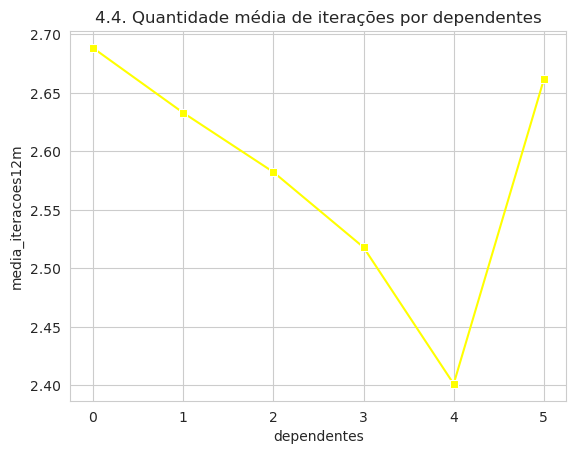

In [54]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(dependentes_iteracoes_df,
                   x = 'dependentes',
                   y = 'media_iteracoes12m',
                   color = 'yellow',
                    marker = 's');
    g.set_title('4.4. Quantidade média de iterações por dependentes');


Resposta:

Há uma tendência de redução de quantidade de iterações conforme aumenta a quantidade de dependentes, com a exceção dos clientes com 5.

Observando esta análise e as 3 anteriores com referência a dependentes, os clientes com 5 dependentes possuem um padrão diferente dos demais.

### 4.5. Quantidade de meses inativo por quantidade de dependentes

**Há alguma influência na quantidade de dependentes em relação à quantidade de meses inativo?** 

QUERY:
>SELECT dependentes, MIN(meses_inativo) AS minimo_meses_inativo, AVG(meses_inativo) AS media_meses_inativo, MAX(meses_inativo) AS maximo_meses_inativo FROM credito GROUP BY (dependentes);

In [55]:
dependentes_inatividade_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-DEPENDENTESxMESES_INATIVO.csv')
dependentes_inatividade_df = dependentes_inatividade_df.query('dependentes != "na"').dropna()
dependentes_inatividade_df.sort_values(by='dependentes')



,dependentes,minimo_meses_inativo,media_meses_inativo,maximo_meses_inativo
2,0.0,1.0,2.287834,6.0
6,1.0,0.0,2.317431,6.0
1,2.0,0.0,2.295588,6.0
5,3.0,0.0,2.224590,6.0
3,4.0,0.0,2.253086,6.0
4,5.0,0.0,2.076923,5.0


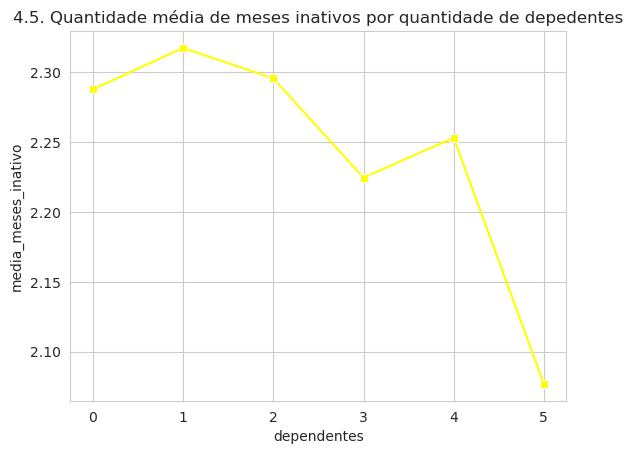

In [56]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(dependentes_inatividade_df,
                   x = 'dependentes',
                   y = 'media_meses_inativo',
                   color = 'yellow',
                    marker = 's');

    g.set_title('4.5. Quantidade média de meses inativos por quantidade de depedentes');


Resposta:

O aumento da quantidade de dependentes implica na menor quantidade de meses inativo.

### 4.6. Quantidade de  transações em 12 meses por quantidade de dependentes

**Há alguma influência na quantidade de dependentes em relação à quantidade de meses inativo?** 

QUERY:
>SELECT dependentes, MIN(qtd_transacoes_12m) AS minimo_quantidade_transacoes, AVG(qtd_transacoes_12m) AS media_quantidade_transacoes, MAX(qtd_transacoes_12m) AS maximo_quantidade_transacoes FROM credito GROUP BY (dependentes);

In [57]:
dependentes_qtdtransac_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-DEPENDENTESxQTD_TRANSACOES12M.csv')
dependentes_qtdtransac_df = dependentes_qtdtransac_df.query('dependentes != "na"').dropna()
dependentes_qtdtransac_df.sort_values(by = 'dependentes')


,dependentes,minimo_quantidade_transacoes,media_quantidade_transacoes,maximo_quantidade_transacoes
6,0.0,10.0,44.017804,91.0
0,1.0,10.0,42.130275,89.0
5,2.0,13.0,41.455882,87.0
1,3.0,11.0,41.006557,87.0
2,4.0,10.0,40.941358,103.0
3,5.0,17.0,39.553846,72.0


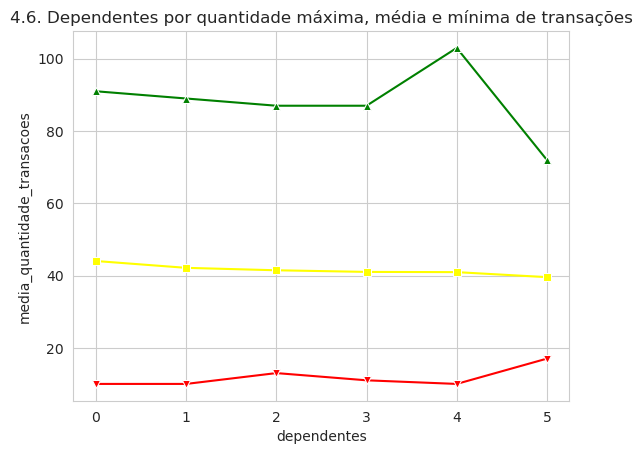

In [58]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(dependentes_qtdtransac_df,
                   x = 'dependentes',
                   y = 'media_quantidade_transacoes',
                   color = 'yellow',
                    marker = 's');
    sns.lineplot(dependentes_qtdtransac_df,
               x = 'dependentes',
               y = 'maximo_quantidade_transacoes',
               color = 'green',
                    marker = '^');
    sns.lineplot(dependentes_qtdtransac_df,
               x = 'dependentes',
               y = 'minimo_quantidade_transacoes',
               color = 'red',
                    marker = 'v');
    g.set_title('4.6. Dependentes por quantidade máxima, média e mínima de transações');


Resposta:

Apesar da pequena variação decrescente, não se observa correlação relevante entre as variáveis. A variação decrestente é contraintuitiva, pois espera-se que mais dependentes levasse à necessidade de mais transações para suprir as demandas diárias.

## 5. Escolaridade

**Como se distribuem as amostras conforme sua escolaridade?**

QUERY: 
> SELECT dependentes, COUNT(dependentes) FROM credito;



In [59]:
escolaridade_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_escolaridade.csv')
escolaridade_df = escolaridade_df.query('escolaridade != "na"').dropna()
escolaridade_df = escolaridade_df.rename({'_col1': 'Amostras', 'escolaridade': 'Nivel_Escolaridade'}, axis = 1)

escolaridade_df['Nivel_Escolaridade'] = np.select([escolaridade_df.Nivel_Escolaridade == 'sem educacao formal',
                             escolaridade_df.Nivel_Escolaridade == 'ensino medio',
                             escolaridade_df.Nivel_Escolaridade == 'graduacao',
                             escolaridade_df.Nivel_Escolaridade == 'mestrado',
                             escolaridade_df.Nivel_Escolaridade == 'doutorado'],
                             ['1. S/ ed. formal',
                              '2. Ens. médio', 
                              '3. Graduação', 
                              '4. Mestrado', 
                              '5. Doutorado'])

escolaridade_df = escolaridade_df.sort_values(by='Nivel_Escolaridade')

print(f'Quantidade de amostras sem "na": {escolaridade_df.Amostras.sum()}')
escolaridade_df


Quantidade de amostras sem "na": 2218


,Nivel_Escolaridade,Amostras
1,1. S/ ed. formal,367
5,2. Ens. médio,545
2,3. Graduação,261
0,4. Mestrado,810
3,5. Doutorado,235


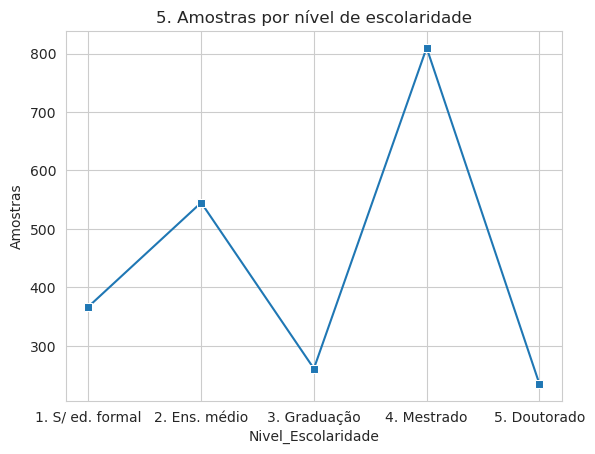

In [60]:
with sns.axes_style('whitegrid'):
    grafico_escolaridade = sns.lineplot(data = escolaridade_df, 
                                       x = 'Nivel_Escolaridade', 
                                       y = 'Amostras',
                                       marker = 's');
    grafico_escolaridade.set_title('5. Amostras por nível de escolaridade');


Resposta:

Trata-se de um recorte atípico onde a maioria das pessoas são mestradas. Nos demais níveis, guardam proporcionalidade com população.


### 5.1. Nível de escolaridade por média de transações nos últimos 12 meses

**Há alguma influência no nível de escolaridade em relação à média de transações nos últimos 12 meses?**

QUERY:
>SELECT escolaridade, MIN(valor_transacoes) AS minimo_transacoes, AVG(valor_transacoes) AS media_transacoes, MAX(valor_transacoes) AS maximo_transacoes FROM credito GROUP BY (escolaridade);

In [61]:
escolaridade_transac_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-ESCOLARIDADExMED_TRANSACOES.csv')
escolaridade_transac_df = escolaridade_transac_df.query('escolaridade != "na"').dropna()
escolaridade_transac_df['escolaridade'] = np.select([escolaridade_transac_df.escolaridade == 'sem educacao formal',
                             escolaridade_transac_df.escolaridade == 'ensino medio',
                             escolaridade_transac_df.escolaridade == 'graduacao',
                             escolaridade_transac_df.escolaridade == 'mestrado',
                             escolaridade_transac_df.escolaridade == 'doutorado'],
                             ['1. S/ ed. formal',
                              '2. Ens. médio', 
                              '3. Graduação', 
                              '4. Mestrado', 
                              '5. Doutorado'])
escolaridade_transac_df = escolaridade_transac_df.sort_values(by='escolaridade')
escolaridade_transac_df

,escolaridade,minimo_transacoes,media_transacoes,maximo_transacoes
6,1. S/ ed. formal,683.34,1819.906076,4740.94
2,2. Ens. médio,594.41,1791.333162,4563.50
0,3. Graduação,510.16,1862.241494,4686.93
3,4. Mestrado,569.87,1825.193651,4642.78
1,5. Doutorado,647.10,1828.659277,4776.58


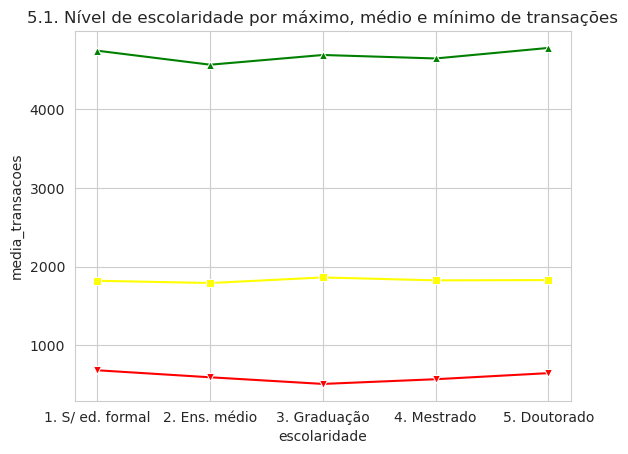

In [62]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(escolaridade_transac_df,
                    x = 'escolaridade',                   
                    y = 'media_transacoes',
                    marker = 's',
                    color = 'yellow');
    sns.lineplot(escolaridade_transac_df,
                    x = 'escolaridade',                   
                    y = 'minimo_transacoes',
                    marker = 'v',
                    color = 'red');
    sns.lineplot(escolaridade_transac_df,
                    x = 'escolaridade',                   
                    y = 'maximo_transacoes',
                    marker = '^',
                    color = 'green');
                 

    g.set_title('5.1. Nível de escolaridade por máximo, médio e mínimo de transações');

Resposta:

O nível de escolaridade não parece influenciar nos níveis de consumo.

### 5.2. Limite por nível de escolaridade

**Há diferença na disponibilização de limite de crédito por nível de escolaridade?**

QUERY:
> SELECT escolaridade, MIN(limite_cartao) AS minimo_limite, AVG(limite_cartao) AS media_limite, MAX(limite_cartao) AS maximo_limite FROM credito GROUP BY (escolaridade);

In [63]:
escolaridade_limite_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-ESCOLARIDADExLIMITE.csv')
escolaridade_limite_df = escolaridade_limite_df.query('escolaridade != "na"').dropna()

escolaridade_limite_df['escolaridade'] = np.select([escolaridade_limite_df.escolaridade == 'sem educacao formal',
                             escolaridade_limite_df.escolaridade == 'ensino medio',
                             escolaridade_limite_df.escolaridade == 'graduacao',
                             escolaridade_limite_df.escolaridade == 'mestrado',
                             escolaridade_limite_df.escolaridade == 'doutorado'],
                             ['1. S/ ed. formal',
                              '2. Ens. médio', 
                              '3. Graduação', 
                              '4. Mestrado', 
                              '5. Doutorado'])

escolaridade_limite_df
escolaridade_limite_df = escolaridade_limite_df.sort_values('escolaridade')


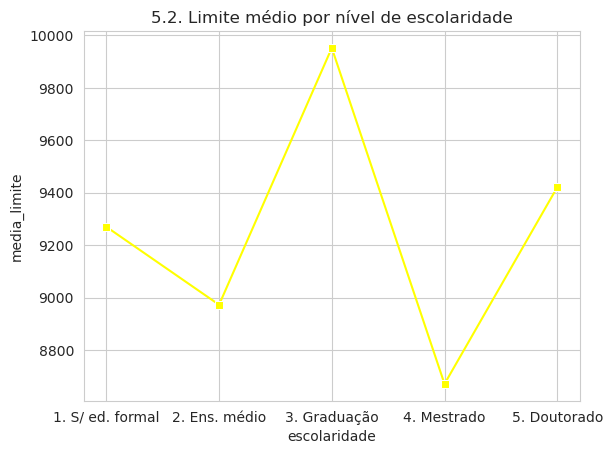

In [64]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(escolaridade_limite_df,
                    x = 'escolaridade',                   
                    y = 'media_limite',
                    marker = 's',
                    color = 'yellow');

    g.set_title('5.2. Limite médio por nível de escolaridade');


Resposta:

Optou-se por não incluir no gráfico os valores máximos e mínimos de limite, pois não estes não apresentaram na tabela diferenciação por nível de escolaridade.

Mesmo assim, os valores médios não apresentam tendência de aumento ou diminuição pelo nível de escolaridade.

### 5.3. Quantidade de produtos adquiridos por nível de escolaridade

**Há alguma influência no nível de escolaridade do cliente em relação à quantidade de produtos adquiridos?** 

QUERY:
>SELECT escolaridade, MIN(qtd_produtos) AS minimo_quantidade_produtos, AVG(qtd_produtos) AS media_quantidade_produtos, MAX(qtd_produtos) AS maximo_quantidade_produtos FROM credito GROUP BY (escolaridade);

In [65]:
escolaridade_qtdprodutos_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-ESCOLARIDADExQTD_PRODUTOS.csv')
escolaridade_qtdprodutos_df = escolaridade_qtdprodutos_df.query('escolaridade != "na"').dropna()

escolaridade_qtdprodutos_df['escolaridade'] = np.select([escolaridade_qtdprodutos_df.escolaridade == 'sem educacao formal',
                             escolaridade_qtdprodutos_df.escolaridade == 'ensino medio',
                             escolaridade_qtdprodutos_df.escolaridade == 'graduacao',
                             escolaridade_qtdprodutos_df.escolaridade == 'mestrado',
                             escolaridade_qtdprodutos_df.escolaridade == 'doutorado'],
                             ['1. S/ ed. formal',
                              '2. Ens. médio', 
                              '3. Graduação', 
                              '4. Mestrado', 
                              '5. Doutorado'])

escolaridade_qtdprodutos_df = escolaridade_qtdprodutos_df.sort_values('escolaridade')

escolaridade_qtdprodutos_df


,escolaridade,minimo_quantidade_produtos,media_quantidade_produtos,maximo_quantidade_produtos
6,1. S/ ed. formal,1.0,4.373297,6.0
2,2. Ens. médio,1.0,4.327206,6.0
3,3. Graduação,1.0,4.222222,6.0
1,4. Mestrado,1.0,4.367574,6.0
4,5. Doutorado,1.0,4.272340,6.0


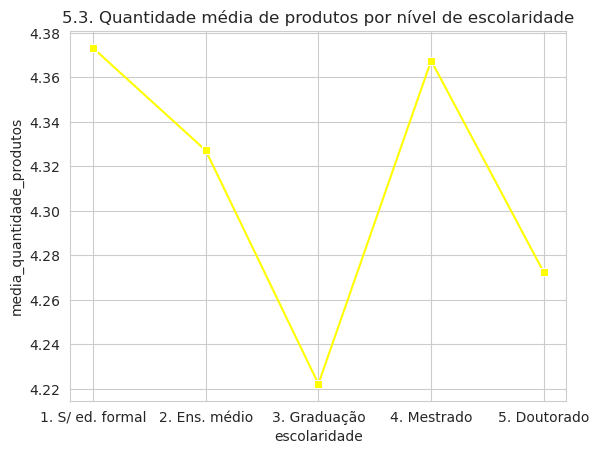

In [66]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(escolaridade_qtdprodutos_df,
                    x = 'escolaridade',                   
                    y = 'media_quantidade_produtos',
                    marker = 's',
                    color = 'yellow');

    g.set_title('5.3. Quantidade média de produtos por nível de escolaridade');


Resposta:

O nível de escolaridade não parece influenciar na quantidade de produtos adquiridos.

### 5.4. Quantidade de iterações por nível de escolaridade

**Há alguma influência no nível de escolaridade em relação à quantidade de iterações?** 

QUERY:
>SELECT escolaridade, MIN(iteracoes_12m) AS minimo_iteracoes12m, AVG(iteracoes_12m) AS media_iteracoes12m, MAX(iteracoes_12m) AS maximo_iteracoes12m FROM credito GROUP BY (escolaridade);

In [67]:
escolaridade_iteracoes_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-ESCOLARIDADExQTD_ITERACOES.csv')
escolaridade_iteracoes_df = escolaridade_iteracoes_df.query('escolaridade != "na"').dropna()


escolaridade_iteracoes_df['escolaridade'] = np.select([escolaridade_iteracoes_df.escolaridade == 'sem educacao formal',
                             escolaridade_iteracoes_df.escolaridade == 'ensino medio',
                             escolaridade_iteracoes_df.escolaridade == 'graduacao',
                             escolaridade_iteracoes_df.escolaridade == 'mestrado',
                             escolaridade_iteracoes_df.escolaridade == 'doutorado'],
                             ['1. S/ ed. formal',
                              '2. Ens. médio', 
                              '3. Graduação', 
                              '4. Mestrado', 
                              '5. Doutorado'])

escolaridade_iteracoes_df = escolaridade_iteracoes_df.sort_values('escolaridade')
escolaridade_iteracoes_df

,escolaridade,minimo_iteracoes12m,media_iteracoes12m,maximo_iteracoes12m
5,1. S/ ed. formal,0.0,2.602180,5.0
0,2. Ens. médio,0.0,2.588235,5.0
1,3. Graduação,0.0,2.636015,5.0
6,4. Mestrado,0.0,2.558168,5.0
2,5. Doutorado,0.0,2.578723,5.0


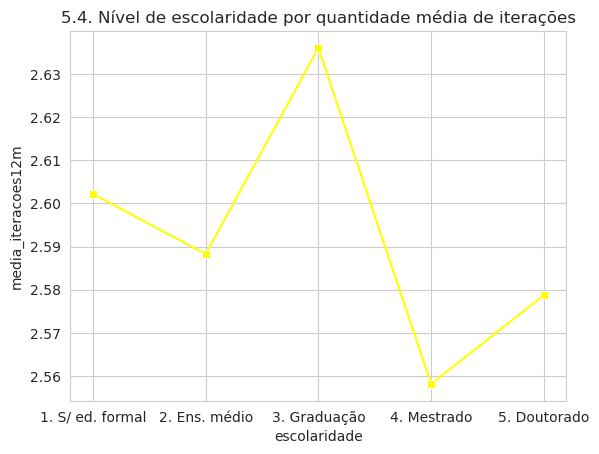

In [68]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(escolaridade_iteracoes_df,
                    x = 'escolaridade',                   
                    y = 'media_iteracoes12m',
                    marker = 's',
                    color = 'yellow');
    g.set_title('5.4. Nível de escolaridade por quantidade média de iterações');


Resposta:

Os maiores níveis de escolaridade (`mestrado` e `doutorado`) aparentam ter sensível menor média de iterações, em relação aos menores níveis de escolaridade (`sem educacao formal` e `ensino medio`).

### 5.5. Quantidade de meses inativo por nível de escolaridade

**Há alguma influência no nível de escolaridade em relação à quantidade de meses inativo?** 

QUERY:
>SELECT escolaridade, MIN(meses_inativo) AS minimo_meses_inativo, AVG(meses_inativo) AS media_meses_inativo, MAX(meses_inativo) AS maximo_meses_inativo FROM credito GROUP BY (escolaridade);

In [69]:
escolaridade_inatividade_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-ESCOLARIDADExMESES_INATIVO.csv')
escolaridade_inatividade_df = escolaridade_inatividade_df.query('escolaridade != "na"').dropna()

escolaridade_inatividade_df['escolaridade'] = np.select([escolaridade_inatividade_df.escolaridade == 'sem educacao formal',
                             escolaridade_inatividade_df.escolaridade == 'ensino medio',
                             escolaridade_inatividade_df.escolaridade == 'graduacao',
                             escolaridade_inatividade_df.escolaridade == 'mestrado',
                             escolaridade_inatividade_df.escolaridade == 'doutorado'],
                             ['1. S/ ed. formal',
                              '2. Ens. médio', 
                              '3. Graduação', 
                              '4. Mestrado', 
                              '5. Doutorado'])

escolaridade_inatividade_df = escolaridade_inatividade_df.sort_values('escolaridade')

escolaridade_inatividade_df


,escolaridade,minimo_meses_inativo,media_meses_inativo,maximo_meses_inativo
6,1. S/ ed. formal,1.0,2.288828,6.0
0,2. Ens. médio,0.0,2.215074,6.0
1,3. Graduação,1.0,2.436782,6.0
3,4. Mestrado,0.0,2.311881,6.0
2,5. Doutorado,1.0,2.195745,6.0


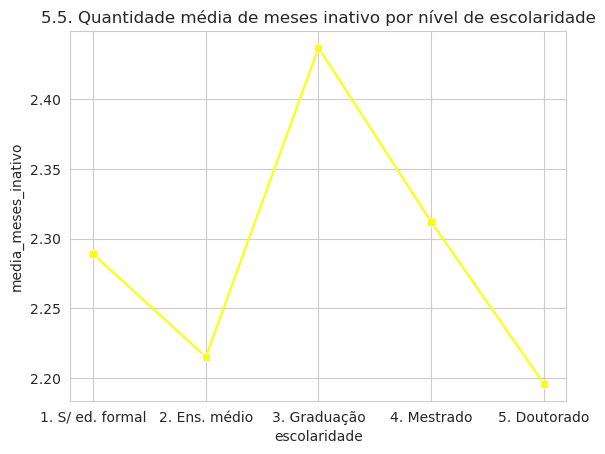

In [70]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(escolaridade_inatividade_df,
                    x = 'escolaridade',                   
                    y = 'media_meses_inativo',
                    marker = 's',
                    color = 'yellow');
    g.set_title('5.5. Quantidade média de meses inativo por nível de escolaridade');


Resposta:

Mais uma vez, não houve influência no nível de escolaridade em relação à quantidade de meses inativo.

### 5.6. Quantidade de transações em 12 meses por nível de escolaridade

**Há alguma influência na nível de escolaridade em relação à quantidade de meses inativo?** 

QUERY:
>SELECT escolaridade, MIN(qtd_transacoes_12m) AS minimo_quantidade_transacoes, AVG(qtd_transacoes_12m) AS media_quantidade_transacoes, MAX(qtd_transacoes_12m) AS maximo_quantidade_transacoes FROM credito GROUP BY (escolaridade);


In [71]:
escolaridade_qtdproduts_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-ESCOLARIDADExQTD_PRODUTOS.csv')
escolaridade_qtdproduts_df = escolaridade_qtdproduts_df.query('escolaridade != "na"').dropna()

escolaridade_qtdproduts_df['escolaridade'] = np.select([escolaridade_qtdproduts_df.escolaridade == 'sem educacao formal',
                             escolaridade_qtdproduts_df.escolaridade == 'ensino medio',
                             escolaridade_qtdproduts_df.escolaridade == 'graduacao',
                             escolaridade_qtdproduts_df.escolaridade == 'mestrado',
                             escolaridade_qtdproduts_df.escolaridade == 'doutorado'],
                             ['1. S/ ed. formal',
                              '2. Ens. médio', 
                              '3. Graduação', 
                              '4. Mestrado', 
                              '5. Doutorado'])

escolaridade_qtdproduts_df = escolaridade_qtdproduts_df.sort_values('escolaridade')

escolaridade_qtdproduts_df


,escolaridade,minimo_quantidade_produtos,media_quantidade_produtos,maximo_quantidade_produtos
6,1. S/ ed. formal,1.0,4.373297,6.0
2,2. Ens. médio,1.0,4.327206,6.0
3,3. Graduação,1.0,4.222222,6.0
1,4. Mestrado,1.0,4.367574,6.0
4,5. Doutorado,1.0,4.272340,6.0


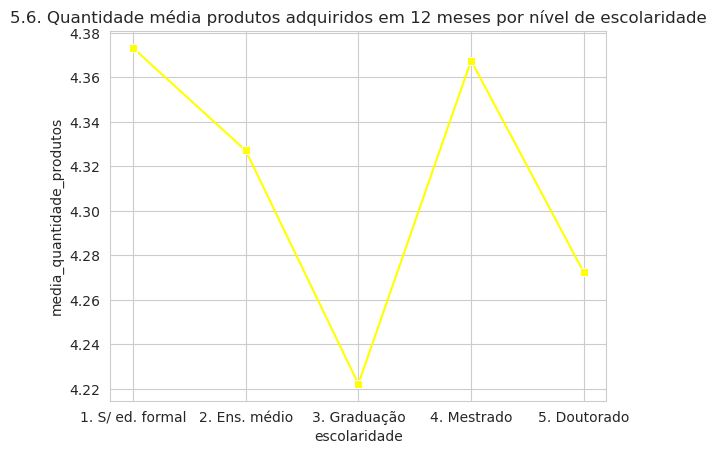

In [72]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(escolaridade_qtdproduts_df,
                    x = 'escolaridade',                   
                    y = 'media_quantidade_produtos',
                    marker = 's',
                    color = 'yellow');
    g.set_title('5.6. Quantidade média produtos adquiridos em 12 meses por nível de escolaridade');


Resposta:

Assim como a maioria das variáveis estudadas associadas à `escolaridade`, verificou-se que esta não é interessante para avaliar categorias, por não contribuir para tomar decisões.

## 6. Salário anual em dólares

A faixa salarial foi ordenada por categoria salarial e reflete aproximadamente a realidade americana, fora a grande concentração de clientes que recebem até os $40 k anuais:

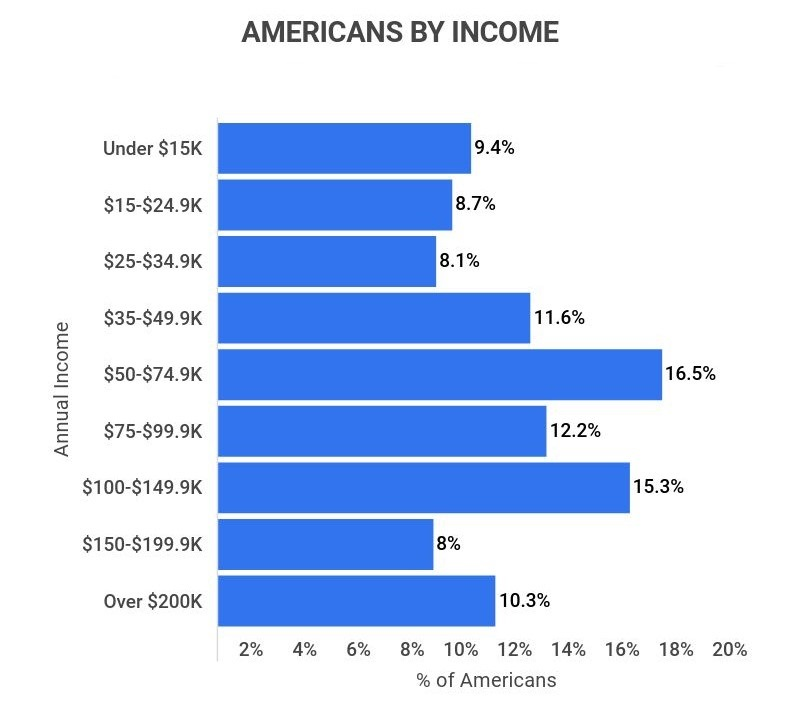

Fonte: https://www.zippia.com/advice/average-american-income/

QUERY:
> SELECT salario_anual, COUNT(salario_anual) FROM credito;

In [73]:
salario_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_salario_anual.csv')
salario_df = salario_df.rename({'_col1': 'Amostras'}, axis = 1)
print(f'Quantidade de amostras: {salario_df.Amostras.sum()}')
salario_df

Quantidade de amostras: 2564


,salario_anual,Amostras
0,na,235
1,$40K - $60K,467
2,$120K +,222
3,$80K - $120K,488
4,$60K - $80K,451
5,menos que $40K,701


In [74]:
salario_df = salario_df[salario_df != 'na'].dropna()

print(f'Quantidade de amostras sem "na": {salario_df.Amostras.sum()}')
salario_df


Quantidade de amostras sem "na": 2329


,salario_anual,Amostras
1,$40K - $60K,467
2,$120K +,222
3,$80K - $120K,488
4,$60K - $80K,451
5,menos que $40K,701


Em seguida, foi aplicado um tratamento estatístico no ponto médio da faixa salarial para facilitar a visualização dos dados.
* menos que 40K => 20.000
* 40K - 60K     => 50.000 
* 60K - 80K     => 70.000
* 80K - 120K    => 100.000
* 120K          => 120.000

O mesmo será aplicado nos demais itens da exploração de dados desta categoria.

In [75]:

salario_df['salario_anual'] = np.select([salario_df.salario_anual.str.contains('menos'), #20.000
                                     salario_df.salario_anual.str.contains('40K '),    #50.000
                                     salario_df.salario_anual.str.contains('60K '),    #70.000
                                     salario_df.salario_anual.str.contains('80K '),    #100.000
                                     (salario_df['salario_anual'] == '$120K +')],        #120.000
                                     [20000, 50000, 70000, 80000, 120000])

salario_df.sort_values(by='salario_anual')



,salario_anual,Amostras
5,20000,701
1,50000,467
4,70000,451
3,80000,488
2,120000,222


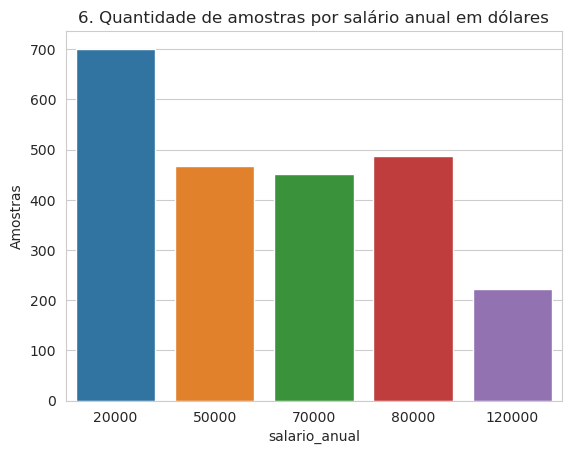

In [76]:
with sns.axes_style('whitegrid'):
    g = sns.barplot(salario_df,
                   x = 'salario_anual',
                   y = 'Amostras')
    g.set_title('6. Quantidade de amostras por salário anual em dólares')


Resposta: 

Talvez por efeito do recorte selecionado, onde muitos cliente têm mestrado, tenha influenciado na faixa salarial acima de 80.000,00 dólares.

### 6.1. Média de transações nos últimos 12 meses por categoria salarial

**Há alguma influência na categoria salarial em relação à média de transações nos últimos 12 meses?**

QUERY:
>SELECT salario_anual, MIN(valor_transacoes) AS minimo_transacoes, AVG(valor_transacoes) AS media_transacoes, MAX(valor_transacoes) AS maximo_transacoes FROM credito GROUP BY (salario_anual);

In [77]:
salario_transac_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-SALARIOxMED_TRANSACOES.csv')
salario_transac_df = salario_transac_df.query('salario_anual != "na"').dropna()

salario_transac_df['salario_anual'] = np.select([salario_transac_df.salario_anual.str.contains('menos'), #20.000
                                     salario_transac_df.salario_anual.str.contains('40K '),    #50.000
                                     salario_transac_df.salario_anual.str.contains('60K '),    #70.000
                                     salario_transac_df.salario_anual.str.contains('80K '),    #100.000
                                     (salario_transac_df['salario_anual'] == '$120K +')],        #120.000
                                     [20000, 50000, 70000, 80000, 120000])

salario_transac_df.sort_values(by='salario_anual')


,salario_anual,minimo_transacoes,media_transacoes,maximo_transacoes
2,20000,510.16,1863.535600,4740.94
3,50000,569.87,1838.264325,4642.78
1,70000,530.36,1820.133533,4491.23
6,80000,563.93,1754.977864,4542.69
4,120000,602.60,1701.465225,4686.93


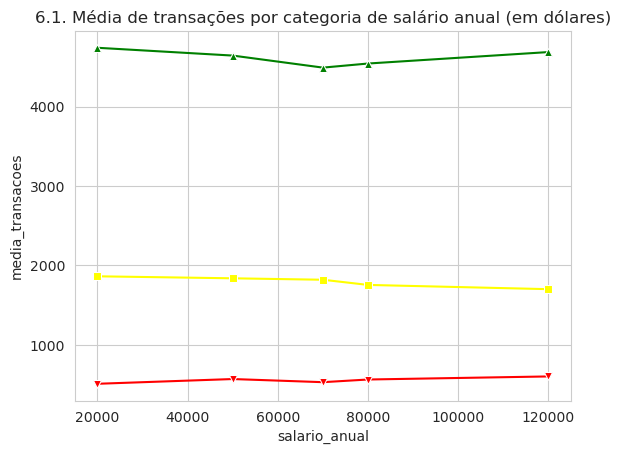

In [78]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(salario_transac_df,
                   x = 'salario_anual',
                   y = 'media_transacoes',
                   color = 'yellow',
                    marker = 's');
    sns.lineplot(salario_transac_df,
               x = 'salario_anual',
               y = 'maximo_transacoes',
               color = 'green',
                    marker = '^');
    sns.lineplot(salario_transac_df,
               x = 'salario_anual',
               y = 'minimo_transacoes',
               color = 'red',
                    marker = 'v');
    g.set_title('6.1. Média de transações por categoria de salário anual (em dólares)');




Resposta:

Existe uma leve tendência de diminuição dos valores anuais médios de transações à medida que aumenta o salário anual.

### 6.2 - Limite por limite de cartão

**Há diferença na disponibilização de limite de crédito por faixa salarial?**

QUERY:
> SELECT salario_anual, MIN(limite_cartao) AS minimo_limite, AVG(limite_cartao) AS media_limite, MAX(limite_cartao) AS maximo_limite FROM credito GROUP BY (salario_anual);

In [79]:
salario_limite_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-SALARIOxLIMITE.csv')
salario_limite_df = salario_limite_df.query('salario_anual != "na"').dropna()

salario_limite_df['salario_anual'] = np.select([salario_limite_df.salario_anual.str.contains('menos'), #20.000
                                     salario_limite_df.salario_anual.str.contains('40K '),    #50.000
                                     salario_limite_df.salario_anual.str.contains('60K '),    #70.000
                                     salario_limite_df.salario_anual.str.contains('80K '),    #100.000
                                     (salario_limite_df['salario_anual'] == '$120K +')],        #120.000
                                     [20000, 50000, 70000, 80000, 120000])


salario_limite_df.sort_values(by='salario_anual')


,salario_anual,minimo_limite,media_limite,maximo_limite
1,20000,1438.07,4093.536643,15987.78
4,50000,1438.03,5348.355803,23981.32
0,70000,1438.26,9088.038378,34516.98
2,80000,1438.33,14910.103963,34516.99
5,120000,1438.89,17801.488243,34516.97


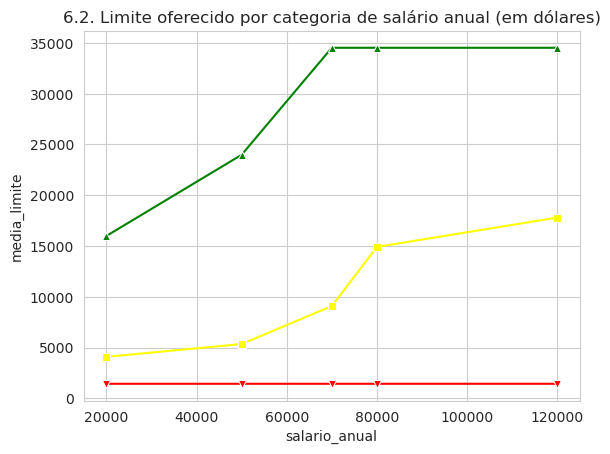

In [80]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(salario_limite_df,
                   x = 'salario_anual',
                   y = 'media_limite',
                   color = 'yellow',
                    marker = 's');
    sns.lineplot(salario_limite_df,
               x = 'salario_anual',
               y = 'maximo_limite',
               color = 'green',
                    marker = '^');
    sns.lineplot(salario_limite_df,
               x = 'salario_anual',
               y = 'minimo_limite',
               color = 'red',
                    marker = 'v');
    g.set_title('6.2. Limite oferecido por categoria de salário anual (em dólares)');


Resposta:

Conforme estudado juntamente com a variável `dependentes`, os maiores salários anuais são acompanhados pela maior quantidade de dependentes, sendo intuitivo que a empresa utilizou como `salario_anual` a agregação de salários do conjunto de titulares e dependentes.

### 6.3. Faixa salarial por quantidade de produtos adquiridos

**Há alguma influência na faixa salarial do cliente em relação à quantidade de produtos adquiridos?** 

QUERY:
>SELECT salario_anual, MIN(qtd_produtos) AS minimo_quantidade_produtos, AVG(qtd_produtos) AS media_quantidade_produtos, MAX(qtd_produtos) AS maximo_quantidade_produtos FROM credito GROUP BY (salario_anual);

In [81]:
salario_qtdprodutos_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-SALARIOxQTD_PRODUTOS.csv')
salario_qtdprodutos_df = salario_qtdprodutos_df.query('salario_anual != "na"').dropna()
salario_qtdprodutos_df

salario_qtdprodutos_df['salario_anual'] = np.select([salario_qtdprodutos_df.salario_anual.str.contains('menos'), #20.000
                                     salario_qtdprodutos_df.salario_anual.str.contains('40K '),    #50.000
                                     salario_qtdprodutos_df.salario_anual.str.contains('60K '),    #70.000
                                     salario_qtdprodutos_df.salario_anual.str.contains('80K '),    #100.000
                                     (salario_qtdprodutos_df['salario_anual'] == '$120K +')],        #120.000
                                     [20000, 50000, 70000, 80000, 120000])


salario_qtdprodutos_df.sort_values(by='salario_anual')


,salario_anual,minimo_quantidade_produtos,media_quantidade_produtos,maximo_quantidade_produtos
1,20000,1.0,4.404286,6.0
2,50000,1.0,4.353319,6.0
6,70000,1.0,4.351111,6.0
0,80000,1.0,4.330595,6.0
3,120000,1.0,4.328829,6.0


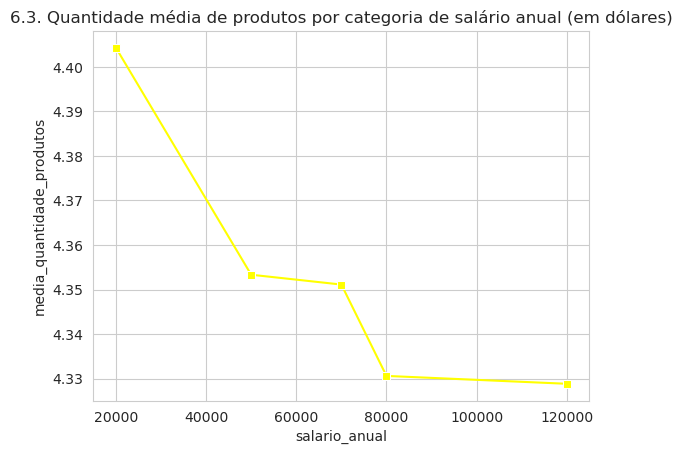

In [82]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(salario_qtdprodutos_df,
                   x = 'salario_anual',
                   y = 'media_quantidade_produtos',
                   color = 'yellow',
                    marker = 's');

    g.set_title('6.3. Quantidade média de produtos por categoria de salário anual (em dólares)');


Resposta:

Conforme a análise 6.1., aparenta-se que os clientes com maior salário anual interagem menos com a empresa e o cartão. O decréscimo é sensível, mas perceptível e aproxima-se ao linear.

### 6.4. Faixa salarial por quantidade de iterações

**Há alguma influência na faixa salarial em relação à quantidade de iterações?** 

QUERY:
>SELECT salario_anual, MIN(iteracoes_12m) AS minimo_iteracoes12m, AVG(iteracoes_12m) AS media_iteracoes12m, MAX(iteracoes_12m) AS maximo_iteracoes12m FROM credito GROUP BY (salario_anual);

In [83]:
salario_iteracoes_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-SALARIOxQTD_ITERACOES.csv')
salario_iteracoes_df = salario_iteracoes_df.query('salario_anual != "na"').dropna()


salario_iteracoes_df['salario_anual'] = np.select([salario_iteracoes_df.salario_anual.str.contains('menos'), #20.000
                                     salario_iteracoes_df.salario_anual.str.contains('40K '),    #50.000
                                     salario_iteracoes_df.salario_anual.str.contains('60K '),    #70.000
                                     salario_iteracoes_df.salario_anual.str.contains('80K '),    #100.000
                                     (salario_iteracoes_df['salario_anual'] == '$120K +')],        #120.000
                                     [20000, 50000, 70000, 80000, 120000])
salario_iteracoes_df.sort_values(by='salario_anual')
      

,salario_anual,minimo_iteracoes12m,media_iteracoes12m,maximo_iteracoes12m
6,20000,0.0,2.607143,5.0
1,50000,0.0,2.633833,5.0
5,70000,0.0,2.511111,5.0
0,80000,0.0,2.529774,5.0
2,120000,0.0,2.554054,5.0


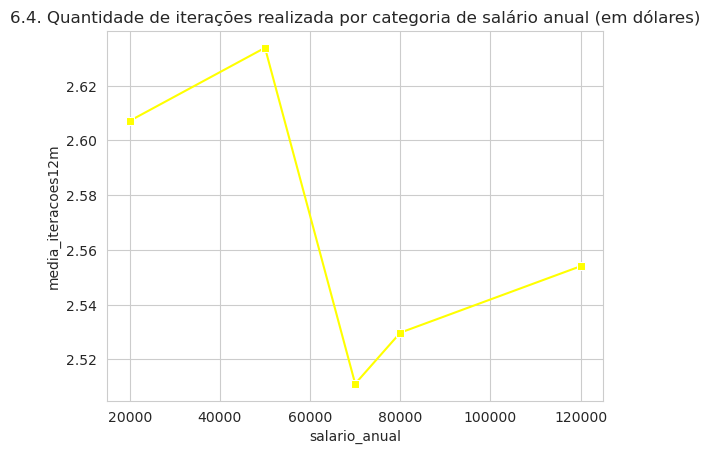

In [84]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(salario_iteracoes_df,
                   x = 'salario_anual',
                   y = 'media_iteracoes12m',
                   color = 'yellow',
                    marker = 's');
 
    g.set_title('6.4. Quantidade de iterações realizada por categoria de salário anual (em dólares)');


Resposta:

A análise atual ecoa a tendência de menos utilização de produtos da empresa conforme aumenta o salário anual.

### 6.5. Faixa salarial anual por quantidade de meses inativo

**Há alguma influência na faixa salarial anual em relação à quantidade de meses inativo?** 

QUERY:
>SELECT salario_anual, MIN(meses_inativo) AS minimo_meses_inativo, AVG(meses_inativo) AS media_meses_inativo, MAX(meses_inativo) AS maximo_meses_inativo FROM credito GROUP BY (salario_anual);


In [85]:
salario_inatividade_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-SALARIOxMESES_INATIVO.csv')
salario_inatividade_df = salario_inatividade_df.query('salario_anual != "na"').dropna()

salario_inatividade_df['salario_anual'] = np.select([salario_inatividade_df.salario_anual.str.contains('menos'), #20.000
                                     salario_inatividade_df.salario_anual.str.contains('40K '),    #50.000
                                     salario_inatividade_df.salario_anual.str.contains('60K '),    #70.000
                                     salario_inatividade_df.salario_anual.str.contains('80K '),    #100.000
                                     (salario_inatividade_df['salario_anual'] == '$120K +')],        #120.000
                                     [20000, 50000, 70000, 80000, 120000])


salario_inatividade_df.sort_values(by='salario_anual')


,salario_anual,minimo_meses_inativo,media_meses_inativo,maximo_meses_inativo
0,20000,0.0,2.280000,6.0
3,50000,0.0,2.207709,6.0
1,70000,1.0,2.311111,6.0
2,80000,1.0,2.318275,6.0
4,120000,0.0,2.220721,6.0


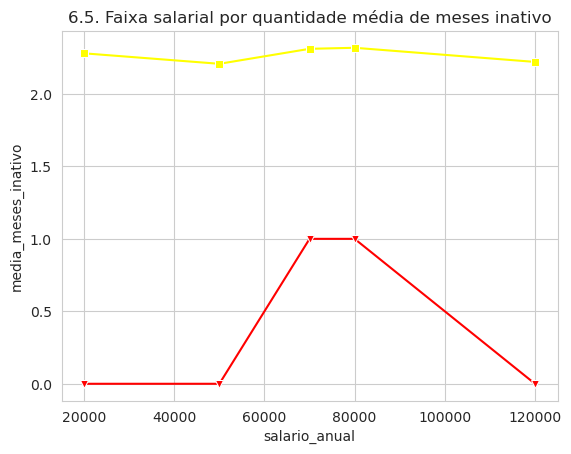

In [86]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(salario_inatividade_df,
                    x = 'salario_anual',                   
                    y = 'media_meses_inativo',
                    marker = 's',
                    color = 'yellow');
    sns.lineplot(salario_inatividade_df,
                    x = 'salario_anual',                   
                    y = 'minimo_meses_inativo',
                    marker = 'v',
                    color = 'red');

    g.set_title('6.5. Faixa salarial por quantidade média de meses inativo');


Resposta: 

Não se observa variação de quantidade de meses inativos em relação com o salário anual.

No gráfico optou-se por retirar do gráfico os valores máximos por não influenciarem estatisticamente.

### 6.6. Faixa salarial por quantidade de transações em 12 meses

**Há alguma influência na faixa salarial em relação à quantidade de meses inativo?** 

QUERY:
>SELECT salario_anual, MIN(qtd_transacoes_12m) AS minimo_quantidade_transacoes, AVG(qtd_transacoes_12m) AS media_quantidade_transacoes, MAX(qtd_transacoes_12m) AS maximo_quantidade_transacoes FROM credito GROUP BY (salario_anual);

In [87]:
salario_qtdtransacoes_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-SALARIOxQTD_TRANSACOES12M.csv')
salario_qtdtransacoes_df = salario_qtdtransacoes_df.query('salario_anual != "na"').dropna()

salario_qtdtransacoes_df['salario_anual'] = np.select([salario_qtdtransacoes_df.salario_anual.str.contains('menos'), #20.000
                                     salario_qtdtransacoes_df.salario_anual.str.contains('40K '),    #50.000
                                     salario_qtdtransacoes_df.salario_anual.str.contains('60K '),    #70.000
                                     salario_qtdtransacoes_df.salario_anual.str.contains('80K '),    #100.000
                                     (salario_qtdtransacoes_df['salario_anual'] == '$120K +')],        #120.000
                                     [20000, 50000, 70000, 80000, 120000])

salario_qtdtransacoes_df.sort_values(by='salario_anual')


,salario_anual,minimo_quantidade_transacoes,media_quantidade_transacoes,maximo_quantidade_transacoes
1,20000,13.0,42.840000,103.0
5,50000,11.0,42.064240,89.0
0,70000,10.0,41.095556,87.0
4,80000,10.0,40.488706,88.0
6,120000,10.0,39.842342,74.0


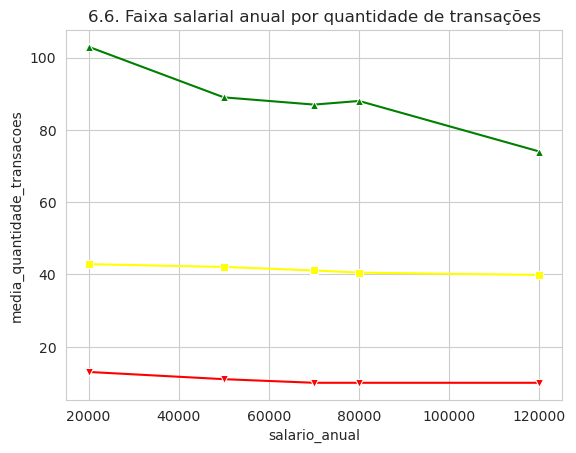

In [88]:
with sns.axes_style('whitegrid'):
    g = sns.lineplot(salario_qtdtransacoes_df,
                    x = 'salario_anual',
                    y = 'media_quantidade_transacoes',
                    marker = 's',
                    color = 'yellow');
    sns.lineplot(salario_qtdtransacoes_df,
                    x = 'salario_anual',
                    y = 'minimo_quantidade_transacoes',
                    marker = 'v',
                    color = 'red');
    sns.lineplot(salario_qtdtransacoes_df,
                    x = 'salario_anual',
                    y = 'maximo_quantidade_transacoes',
                    marker = '^',
                    color = 'green');
    g.set_title('6.6. Faixa salarial anual por quantidade de transações');

Resposta: 

A variação média de quantidade de transações sofre um leve declínio com o aumento do salário anual, contudo, nota-se que os valores máximos e mínimos de quantidade de transações também decrescem.

## 7. Categoria de cartão

**Quantas amostras de clientes possuem cada categoria de cartão?**

QUERY:
> SELECT tipo_cartao, COUNT(tipo_cartao) FROM credito;

Entendeu-se que a sequência ordenada do mais básico ao mais sofisticado dos níveis de produto seria: blue (mais abundante), silver, gold e platinum (mais raro). Desta forma, a categoria `tipo_cartao` foi parametrizada com um valor indicador de ordem.

In [89]:
cartao_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_tipo_cartao.csv')

cartao_df = cartao_df.rename({'_col1': 'Amostras'}, axis = 1)

cartao_df['tipo_cartao'] = np.select([cartao_df.tipo_cartao.str.contains('blue'), 
                                   cartao_df.tipo_cartao.str.contains('silver'), 
                                   cartao_df.tipo_cartao.str.contains('gold'), 
                                   cartao_df['tipo_cartao'] == 'platinum'],
                                  ('1-blue','2-silver','3-gold','4-platinum'))

cartao_df = cartao_df.sort_values(by='tipo_cartao')

print(f'Quantidade de amostras: {cartao_df.Amostras.sum()}')
cartao_df


Quantidade de amostras: 2564


,tipo_cartao,Amostras
2,1-blue,2453
1,2-silver,93
3,3-gold,16
0,4-platinum,2


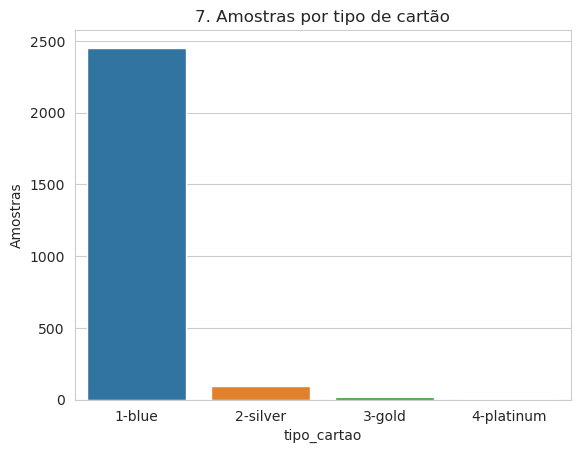

In [90]:
with sns.axes_style('whitegrid'):
    grafico_salario = sns.barplot(data = cartao_df, 
                                       x = 'tipo_cartao', 
                                       y = 'Amostras');
    grafico_salario.set_title('7. Amostras por tipo de cartão');


Resposta:

Observa-se que quase a totalidade de amostras possui o cartão de categoria "blue" e uma amostra mínima possui cartão "platinum".

### 7.1. Tipo de cartão por média de transações nos últimos 12 meses

**Há alguma influência no tipo de cartão em relação à média de transações nos últimos 12 meses?**

QUERY:
>SELECT tipo_cartao, MIN(valor_transacoes) AS minimo_transacoes, AVG(valor_transacoes) AS media_transacoes, MAX(valor_transacoes) AS maximo_transacoes FROM credito GROUP BY (tipo_cartao);

In [91]:
cartao_transac_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-CARTAOxMED_TRANSACOES.csv')
cartao_transac_df = cartao_transac_df.query('tipo_cartao != "na"').dropna()


cartao_transac_df['tipo_cartao'] = np.select([cartao_transac_df.tipo_cartao.str.contains('blue'), 
                                   cartao_transac_df.tipo_cartao.str.contains('silver'), 
                                   cartao_transac_df.tipo_cartao.str.contains('gold'), 
                                   cartao_transac_df['tipo_cartao'] == 'platinum'],
                                  ('1-blue','2-silver','3-gold','4-platinum'))

cartao_transac_df = cartao_transac_df.sort_values(by='tipo_cartao')

cartao_transac_df

,tipo_cartao,minimo_transacoes,media_transacoes,maximo_transacoes
3,1-blue,510.16,1817.191698,4776.58
0,2-silver,691.10,1883.249785,4063.55
4,3-gold,966.80,2040.231875,4149.18
2,4-platinum,1156.61,1543.225000,1929.84


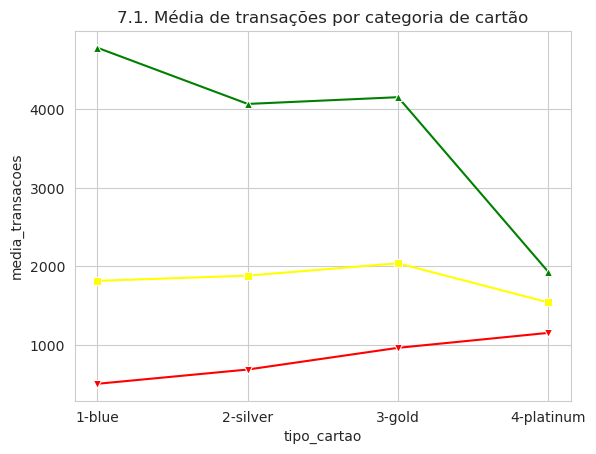

In [92]:
with sns.axes_style('whitegrid'):
    cartao_transac_graf = sns.lineplot(data = cartao_transac_df, 
                                       x = 'tipo_cartao', 
                                       y = 'media_transacoes',
                                      marker = 's',
                                      color = 'yellow');
    sns.lineplot(data = cartao_transac_df, 
                   x = 'tipo_cartao', 
                   y = 'minimo_transacoes',
                  marker = 'v',
                  color = 'red');
    sns.lineplot(data = cartao_transac_df, 
                   x = 'tipo_cartao', 
                   y = 'maximo_transacoes',
                  marker = '^',
                  color = 'green');
    cartao_transac_graf.set_title('7.1. Média de transações por categoria de cartão');


Resposta: 

Há uma leve tendência de crescimento na média de transações conforme aumenta o nível do cartão, com a exceção da categoria platinum. Esta alteração de sentido pode ser consequência do ao recorte de amostrar selecionado para o projeto.

### 7.2. Limite por tipo de cartão

**Há diferença na disponibilização de limite de crédito por tipo de cartão?**

QUERY:
> SELECT tipo_cartao, MIN(limite_cartao) AS minimo_limite, AVG(limite_cartao) AS media_limite, MAX(limite_cartao) AS maximo_limite FROM credito GROUP BY (tipo_cartao);

In [93]:
cartao_limite_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-CARTAOxLIMITE.csv')
cartao_limite_df = cartao_limite_df.query('tipo_cartao != "na"').dropna()


cartao_limite_df['tipo_cartao'] = np.select([cartao_limite_df.tipo_cartao.str.contains('blue'), 
                                   cartao_limite_df.tipo_cartao.str.contains('silver'), 
                                   cartao_limite_df.tipo_cartao.str.contains('gold'), 
                                   cartao_limite_df['tipo_cartao'] == 'platinum'],
                                  ('1-blue','2-silver','3-gold','4-platinum'))

cartao_limite_df = cartao_limite_df.sort_values(by='tipo_cartao')

cartao_limite_df

,tipo_cartao,minimo_limite,media_limite,maximo_limite
2,1-blue,1438.03,8293.118710,34516.99
0,2-silver,10091.74,25637.677742,34516.99
3,3-gold,15433.35,29163.107500,34516.98
4,4-platinum,34516.25,34516.605000,34516.96


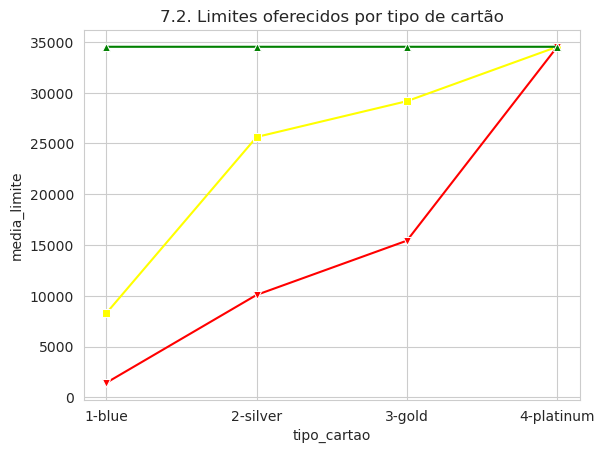

In [94]:
with sns.axes_style('whitegrid'):
    cartao_transac_graf = sns.lineplot(data = cartao_limite_df, 
                                       x = 'tipo_cartao', 
                                       y = 'media_limite',
                                      marker = 's',
                                      color = 'yellow');
    sns.lineplot(data = cartao_limite_df, 
                   x = 'tipo_cartao', 
                   y = 'minimo_limite',
                  marker = 'v',
                  color = 'red');
    sns.lineplot(data = cartao_limite_df, 
                   x = 'tipo_cartao', 
                   y = 'maximo_limite',
                  marker = '^',
                  color = 'green');
    cartao_transac_graf.set_title('7.2. Limites oferecidos por tipo de cartão');


Resposta: 

Evidencia-se no gráfico a oferta de maiores limites com categorias melhores de cartão.

Observa-se também que a categoria de cartão não é limitante para o máximo de limite oferecido, apesar de que a média aumenta conforme a categoria melhora.

### 7.3. Quantidade de produtos adquiridos por categoria de cartão

**Há alguma influência na categoria de cartão do cliente em relação à quantidade de produtos adquiridos?** 

QUERY:
>SELECT tipo_cartao, MIN(qtd_produtos) AS minimo_quantidade_produtos, AVG(qtd_produtos) AS media_quantidade_produtos, MAX(qtd_produtos) AS maximo_quantidade_produtos FROM credito GROUP BY (tipo_cartao);

In [95]:
cartao_produtos_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-CARTAOxQTD_PRODUTOS.csv')
cartao_produtos_df = cartao_produtos_df.query('tipo_cartao != "na"').dropna()


cartao_produtos_df['tipo_cartao'] = np.select([cartao_produtos_df.tipo_cartao.str.contains('blue'), 
                                   cartao_produtos_df.tipo_cartao.str.contains('silver'), 
                                   cartao_produtos_df.tipo_cartao.str.contains('gold'), 
                                   cartao_produtos_df['tipo_cartao'] == 'platinum'],
                                  ('1-blue','2-silver','3-gold','4-platinum'))

cartao_produtos_df = cartao_produtos_df.sort_values(by='tipo_cartao')

cartao_produtos_df


,tipo_cartao,minimo_quantidade_produtos,media_quantidade_produtos,maximo_quantidade_produtos
3,1-blue,1.0,4.360816,6.0
0,2-silver,1.0,4.290323,6.0
4,3-gold,2.0,4.187500,6.0
2,4-platinum,3.0,3.000000,3.0


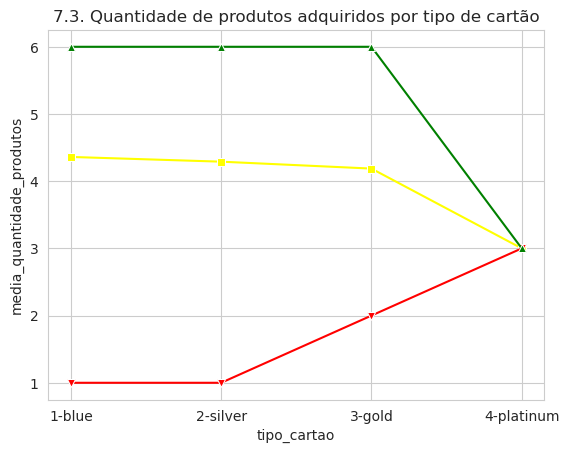

In [96]:
with sns.axes_style('whitegrid'):
    cartao_produtos_graf = sns.lineplot(data = cartao_produtos_df, 
                                       x = 'tipo_cartao', 
                                       y = 'media_quantidade_produtos',
                                      marker = 's',
                                      color = 'yellow');
    sns.lineplot(data = cartao_produtos_df, 
                   x = 'tipo_cartao', 
                   y = 'minimo_quantidade_produtos',
                  marker = 'v',
                  color = 'red');
    sns.lineplot(data = cartao_produtos_df, 
                   x = 'tipo_cartao', 
                   y = 'maximo_quantidade_produtos',
                  marker = '^',
                  color = 'green');
    cartao_produtos_graf.set_title('7.3. Quantidade de produtos adquiridos por tipo de cartão');


Resposta: 

Observa-se que os clientes que possuem melhores categorias de cartão, adquirem menos produtos.

### 7.4. Quantidade de iterações por categoria de cartão

**Há alguma influência na categoria de cartão em relação à quantidade de iterações?** 

QUERY:
>SELECT tipo_cartao, MIN(iteracoes_12m) AS minimo_iteracoes12m, AVG(iteracoes_12m) AS media_iteracoes12m, MAX(iteracoes_12m) AS maximo_iteracoes12m FROM credito GROUP BY (tipo_cartao);

In [97]:
cartao_interac_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-CARTAOxQTD_ITERACOES.csv')
cartao_interac_df = cartao_interac_df.query('tipo_cartao != "na"').dropna()


cartao_interac_df['tipo_cartao'] = np.select([cartao_interac_df.tipo_cartao.str.contains('blue'), 
                                   cartao_interac_df.tipo_cartao.str.contains('silver'), 
                                   cartao_interac_df.tipo_cartao.str.contains('gold'), 
                                   cartao_interac_df['tipo_cartao'] == 'platinum'],
                                  ('1-blue','2-silver','3-gold','4-platinum'))

cartao_interac_df = cartao_interac_df.sort_values(by='tipo_cartao')

cartao_interac_df


,tipo_cartao,minimo_iteracoes12m,media_iteracoes12m,maximo_iteracoes12m
1,1-blue,0.0,2.576735,5.0
3,2-silver,0.0,2.440860,5.0
2,3-gold,2.0,2.500000,3.0
0,4-platinum,2.0,2.000000,2.0


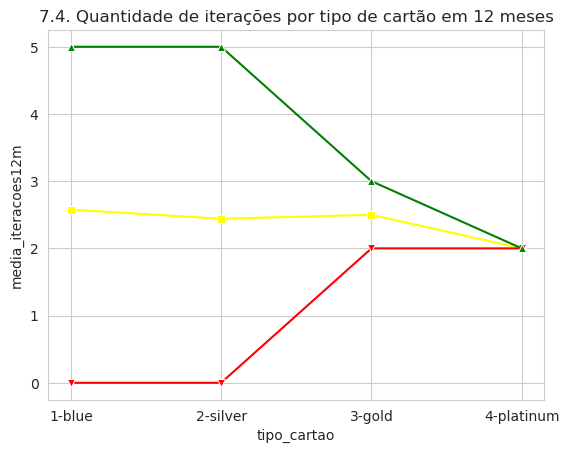

In [98]:
with sns.axes_style('whitegrid'):
    cartao_interac_graf = sns.lineplot(data = cartao_interac_df, 
                                       x = 'tipo_cartao', 
                                       y = 'media_iteracoes12m',
                                      marker = 's',
                                      color = 'yellow');
    sns.lineplot(data = cartao_interac_df, 
                   x = 'tipo_cartao', 
                   y = 'minimo_iteracoes12m',
                  marker = 'v',
                  color = 'red');
    sns.lineplot(data = cartao_interac_df, 
                   x = 'tipo_cartao', 
                   y = 'maximo_iteracoes12m',
                  marker = '^',
                  color = 'green');
    cartao_interac_graf.set_title('7.4. Quantidade de iterações por tipo de cartão em 12 meses');


Resposta:

Clientes com melhores categorias de cartão realizam menos iterações junto com a companhia.

### 7.5. Quantidade de meses inativo por tipo de cartão

**Há alguma influência no tipo de cartão anual em relação à quantidade de meses inativo?** 

QUERY:
>SELECT tipo_cartao, MIN(meses_inativo) AS minimo_meses_inativo, AVG(meses_inativo) AS media_meses_inativo, MAX(meses_inativo) AS maximo_meses_inativo FROM credito GROUP BY (tipo_cartao);
 

In [99]:
cartao_inativo_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-CARTAOxMESES_INATIVO.csv')
cartao_inativo_df = cartao_inativo_df.query('tipo_cartao != "na"').dropna()


cartao_inativo_df['tipo_cartao'] = np.select([cartao_inativo_df.tipo_cartao.str.contains('blue'), 
                                   cartao_inativo_df.tipo_cartao.str.contains('silver'), 
                                   cartao_inativo_df.tipo_cartao.str.contains('gold'), 
                                   cartao_inativo_df['tipo_cartao'] == 'platinum'],
                                  ('1-blue','2-silver','3-gold','4-platinum'))

cartao_inativo_df = cartao_inativo_df.sort_values(by='tipo_cartao')

cartao_inativo_df


,tipo_cartao,minimo_meses_inativo,media_meses_inativo,maximo_meses_inativo
2,1-blue,0.0,2.276327,6.0
1,2-silver,0.0,2.236559,6.0
3,3-gold,1.0,1.812500,3.0
0,4-platinum,1.0,1.500000,2.0


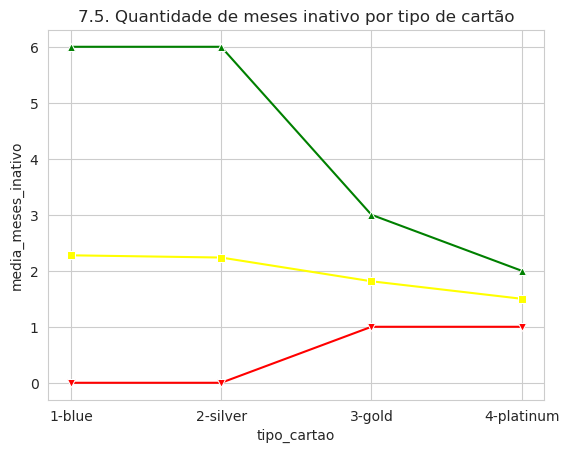

In [100]:
with sns.axes_style('whitegrid'):
    cartao_inativo_graf = sns.lineplot(data = cartao_inativo_df, 
                                       x = 'tipo_cartao', 
                                       y = 'media_meses_inativo',
                                      marker = 's',
                                      color = 'yellow');
    sns.lineplot(data = cartao_inativo_df, 
                   x = 'tipo_cartao', 
                   y = 'minimo_meses_inativo',
                  marker = 'v',
                  color = 'red');
    sns.lineplot(data = cartao_inativo_df, 
                   x = 'tipo_cartao', 
                   y = 'maximo_meses_inativo',
                  marker = '^',
                  color = 'green');
    cartao_inativo_graf.set_title('7.5. Quantidade de meses inativo por tipo de cartão');


Resposta:

Avalia-se através do gráfico que há menos meses de inatividade conforme melhora a categoria de cartão. Também, através dos marcadores de máximos e mínimos, que existe menor variância.


### 7.6. Quantidade de transações em 12 meses por tipo de cartão

**Há alguma influência no tipo de cartão oferecido em relação à quantidade de transações em 12 meses?** 

QUERY:
>SELECT tipo_cartao, MIN(qtd_transacoes_12m) AS minimo_quantidade_transacoes, AVG(qtd_transacoes_12m) AS media_quantidade_transacoes, MAX(qtd_transacoes_12m) AS maximo_quantidade_transacoes FROM credito GROUP BY (tipo_cartao);


In [101]:
cartao_qtdtransac_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/projeto-CARTAOxQTD_TRANSACOES12M.csv')
cartao_qtdtransac_df = cartao_qtdtransac_df.query('tipo_cartao != "na"').dropna()


cartao_qtdtransac_df['tipo_cartao'] = np.select([cartao_qtdtransac_df.tipo_cartao.str.contains('blue'), 
                                   cartao_qtdtransac_df.tipo_cartao.str.contains('silver'), 
                                   cartao_qtdtransac_df.tipo_cartao.str.contains('gold'), 
                                   cartao_qtdtransac_df['tipo_cartao'] == 'platinum'],
                                  ('1-blue','2-silver','3-gold','4-platinum'))

cartao_qtdtransac_df = cartao_qtdtransac_df.sort_values(by='tipo_cartao')

cartao_qtdtransac_df


,tipo_cartao,minimo_quantidade_transacoes,media_quantidade_transacoes,maximo_quantidade_transacoes
3,1-blue,10.0,41.607347,103.0
0,2-silver,13.0,43.784946,91.0
4,3-gold,22.0,47.250000,86.0
2,4-platinum,29.0,34.500000,40.0


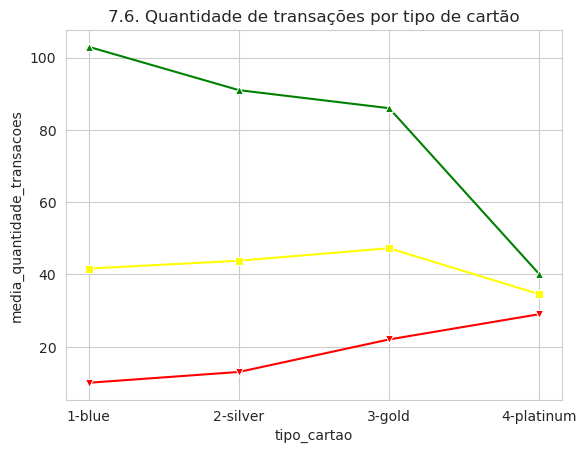

In [102]:
with sns.axes_style('whitegrid'):
    cartao_qtdtransac_graf = sns.lineplot(data = cartao_qtdtransac_df, 
                                       x = 'tipo_cartao', 
                                       y = 'media_quantidade_transacoes',
                                      marker = 's',
                                      color = 'yellow');
    sns.lineplot(data = cartao_qtdtransac_df, 
                   x = 'tipo_cartao', 
                   y = 'minimo_quantidade_transacoes',
                  marker = 'v',
                  color = 'red');
    sns.lineplot(data = cartao_qtdtransac_df, 
                   x = 'tipo_cartao', 
                   y = 'maximo_quantidade_transacoes',
                  marker = '^',
                  color = 'green');
    cartao_qtdtransac_graf.set_title('7.6. Quantidade de transações por tipo de cartão');


Resposta:

Há um aumento sensível de quantidade de produtos conforme melhora a categoria de cartão, porém, a categoria "platinum" destoou dos demais devido à quantidade pequena de amostras.

## 8. Valor das transações dos últimos 12 meses

**Como se distribuem as médias de transação no conjunto levantado?**

QUERY: 
> SELECT MIN(valor_transacoes) AS minimo_transacoes, AVG(valor_transacoes) AS media_transacoes, MAX(valor_transacoes) AS maximo_transacoes FROM credito;

In [103]:
transacoes_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_valor_transacao.csv')
transacoes_df

,minimo_transacoes,media_transacoes,maximo_transacoes
0,510.16,1820.3261,4776.58


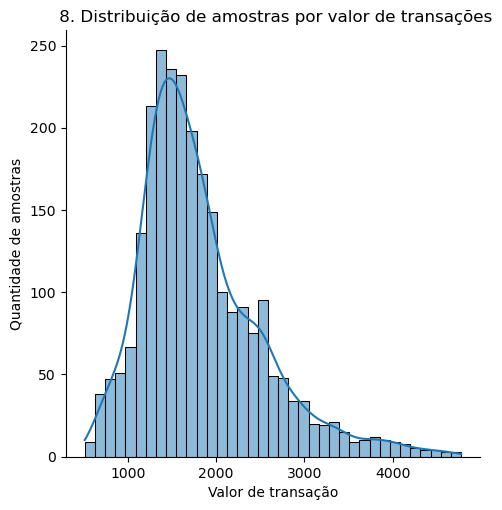

In [104]:
grafico_transacoes = sns.displot(credito_df.valor_transacoes, kde = True);
grafico_transacoes.set(title = ' 8. Distribuição de amostras por valor de transações');
grafico_transacoes.set_axis_labels('Valor de transação', 'Quantidade de amostras');

Resposta:

Observa-se a concentração de valor de transações ao redor de 1,500.00 dólares.

Aparentemente a distribuição não apresenta distorções relevantes.

## 9. Valor de limite do cartão 

**Como se distribuem os limites de cartão oferecidos no conjunto de amostras?**

QUERY: 
> SELECT MIN(limite_cartao) AS minimo_limite, AVG(limite_cartao) AS media_limite, MAX(limite_cartao) AS maximo_limite FROM credito;

In [105]:
limite_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_limite_cartao.csv')
limite_df

,minimo_limite,media_limite,maximo_limite
0,1438.03,9072.720293,34516.99


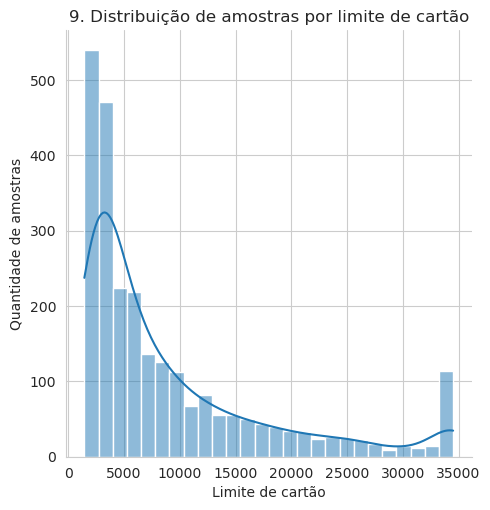

In [106]:
with sns.axes_style('whitegrid'):
    grafico_limite = sns.displot(credito_df.limite_cartao, kde = True);
    grafico_limite.set(title = '9. Distribuição de amostras por limite de cartão');
    grafico_limite.set_axis_labels('Limite de cartão', 'Quantidade de amostras');
    

Resposta:

Observa-se uma distribuição normal de redução de quantidade de amostras à medida que aumenta o limite oferecido para os cartões.

Porém, nota-se uma anomalia no limite superior do cartão (34.000 a 35.000 dólares), carecendo de avaliação mais detalhada.


## 10. Quantidade de produtos adquiridos

**Como os clientes se relacionam com a empresa em relação à quantidade de produtos adquiridos?**

QUERY:
> SELECT qtd_produtos, COUNT(qtd_produtos) FROM credito;

In [107]:
qtdeprodutos_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_qtd_produtos.csv')
qtdeprodutos_df = qtdeprodutos_df.rename({'_col1': 'Amostras'}, axis = 1)

print(f'Quantidade de amostras: {qtdeprodutos_df.Amostras.sum()}')
qtdeprodutos_df

Quantidade de amostras: 2564


,qtd_produtos,Amostras
0,6,624
1,2,101
2,3,631
3,1,32
4,5,596
5,4,580


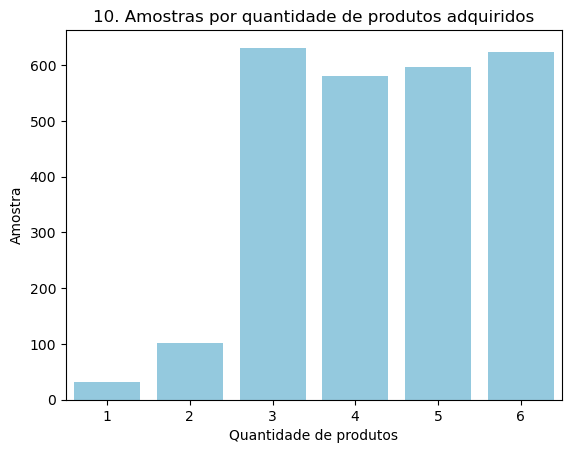

In [108]:
grafico_produtos = sns.barplot(data = qtdeprodutos_df, 
                                   x = 'qtd_produtos', 
                                   y = 'Amostras',
                                  order = [1, 2, 3, 4 ,5 ,6],
                              color = 'skyblue');
grafico_produtos.set(title = '10. Amostras por quantidade de produtos adquiridos',
                    xlabel = 'Quantidade de produtos',
                    ylabel = 'Amostra');


Resposta:

A maioria dos clientes adquiriram entre 3 e 6 produtos do banco, enquanto poucos adquiriram 1 a 2 produtos, como se observa abaixo.

## 11. Quantidade de meses sem atividade junto a empresa

**Como se distribuem as quantidades de meses em que cada cliente ficou inativo?**

QUERY:
> SELECT meses_inativo, COUNT(meses_inativo) FROM credito;



In [109]:
inatividade_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_meses_inativo.csv')
inatividade_df = inatividade_df.rename({'_col1': 'Amostras'}, axis = 1)

print(f'Quantidade de amostras: {inatividade_df.Amostras.sum()}')
inatividade_df


Quantidade de amostras: 2564


,meses_inativo,Amostras
0,1,631
1,6,27
2,4,97
3,5,29
4,3,946
5,2,828
6,0,6


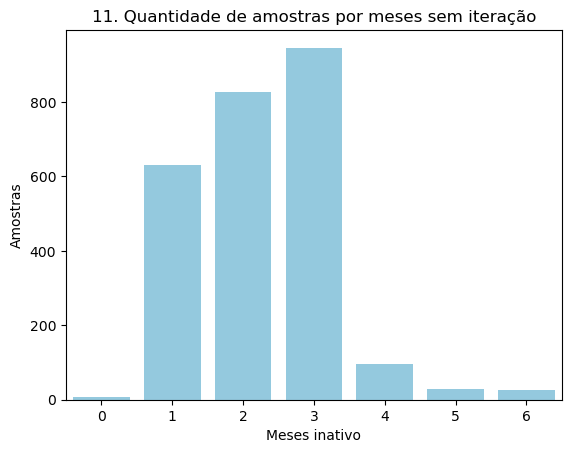

In [110]:
grafico_inatividade = sns.barplot(data = inatividade_df,
                               x = 'meses_inativo',
                               y = 'Amostras',
                               order = [0,1,2,3,4,5,6],
                                 color = 'skyblue');
grafico_inatividade.set(title = '11. Quantidade de amostras por meses sem iteração',
                       xlabel = 'Meses inativo',
                        ylabel = 'Amostras');


Resposta:

Observa-se que é normal o cliente ficar entre 1 e 3 meses sem realizar atividades com a empresa e que praticamente nenhum cliente tem iteração frequente (0 meses).


## 12. Quantidade de iterações em 12 meses

**Como é a distribuição da quantidade de iterações em 12 meses de?**

QUERY:
> SELECT iteracoes_12m, COUNT(iteracoes_12m) FROM credito;

In [111]:
iteracoes_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_iteracoes_12m.csv')
iteracoes_df = iteracoes_df.rename({'_col1': 'Amostras'}, axis = 1)

print(f'Quantidade de amostras: {iteracoes_df.Amostras.sum()}')
iteracoes_df

Quantidade de amostras: 2564


,iteracoes_12m,Amostras
0,4,482
1,5,51
2,3,837
3,1,163
4,2,866
5,0,165


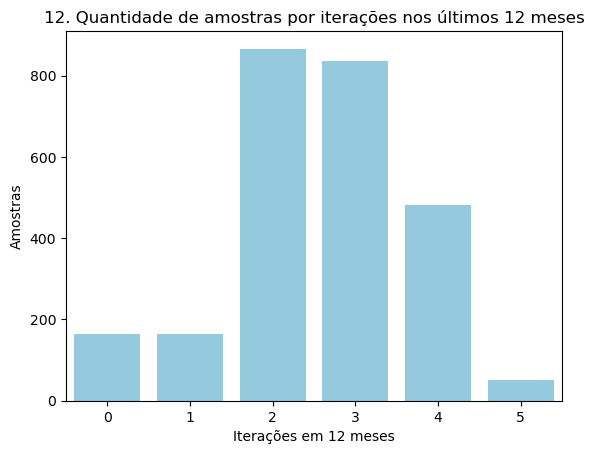

In [112]:
grafico_iteracoes = sns.barplot(data = iteracoes_df,
                               x = 'iteracoes_12m',
                               y = 'Amostras',
                               order = [0,1,2,3,4,5],
                               color = 'skyblue');
grafico_iteracoes.set(title = '12. Quantidade de amostras por iterações nos últimos 12 meses',
                     xlabel = 'Iterações em 12 meses',
                     ylabel = 'Amostras');


Resposta:

Observam-se 2 a 4 iterações anuais da maioria dos clientes.


## 13. Quantidade de transações em 12 meses

**Quantas transações anuais os clientes realizam?**

QUERY: 
> SELECT MIN(qtd_transacoes_12m) AS minimo_qtd_transacoes, AVG(qtd_transacoes_12m) AS media_qtd_transacoes, MAX(qtd_transacoes_12m) AS maximo_qtd_transacoes FROM credito;

In [113]:
qtd_transacoes_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_qtd_transacoes_12m.csv')
qtd_transacoes_df


,minimo_qtd_transacoes,media_qtd_transacoes,maximo_qtd_transacoes
0,10,41.704368,103


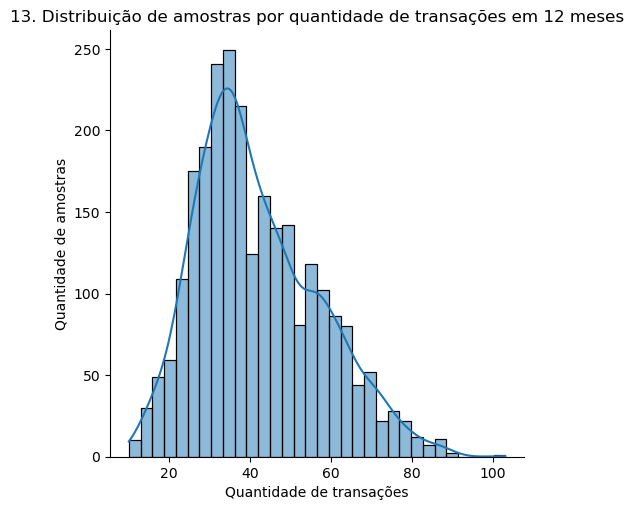

In [114]:
grafico_limite = sns.displot(credito_df.qtd_transacoes_12m, kde = True);
grafico_limite.set(title = '13. Distribuição de amostras por quantidade de transações em 12 meses');
grafico_limite.set_axis_labels('Quantidade de transações', 'Quantidade de amostras');


Resposta:

Observou-se a média de 41,7 operações anuais, equivalente aproximadamente 3,5 operações mensais.

# Análise de dados

**Quais variáveis apresentam maiores níveis de correlação?**

Para resolver essa pergunta, utilizou-se a base de dados original e realizou-se um tratamento de dados para as variáveis categóricas (ordinais e nominais).

Em seguida, foi gerado um mapa de calor de correlação entre as variáveis.

In [115]:
df = credito_df.dropna()
df['sexo_m'] = np.select([df['sexo'] == 'M', df['sexo'] == 'F'],[1,0])
df['sexo_f'] = np.select([df['sexo'] == 'F', df['sexo'] == 'M'],[1,0])
df['escolaridade_ord'] = np.select([df['escolaridade'] == 'sem educacao formal', df['escolaridade'] == 'ensino medio', 
                                    df['escolaridade'] == 'graduacao', df['escolaridade'] == 'mestrado', df['escolaridade'] == 'doutorado'],
                                  [0, 1, 2, 3, 4])
df['estado_civil_solteiro'] = np.select([df['estado_civil'] == 'solteiro', df['estado_civil'] == 'casado', df['estado_civil'] == 'divorciado'],[1,0,0])
df['estado_civil_casado'] = np.select([df['estado_civil'] == 'solteiro', df['estado_civil'] == 'casado', df['estado_civil'] == 'divorciado'],[0,1,0])
df['estado_civil_divorciado'] = np.select([df['estado_civil'] == 'solteiro', df['estado_civil'] == 'casado', df['estado_civil'] == 'divorciado'],[0,0,1])
df['salario_anual_ord'] = np.select([df.salario_anual.str.contains('menos'), #0
                                     df.salario_anual.str.contains('40K '),    #1
                                     df.salario_anual.str.contains('60K '),    #2
                                     df.salario_anual.str.contains('80K '),    #3
                                     df['salario_anual'] == '$120K +'],        #4
                                     [0, 1, 2, 3, 4])
df['tipo_cartao_ord'] = np.select([df['tipo_cartao'] == 'blue', df['tipo_cartao'] == 'silver', 
                                    df['tipo_cartao'] == 'gold', df['tipo_cartao'] == 'diamond'],
                                  [0, 1, 2, 3])


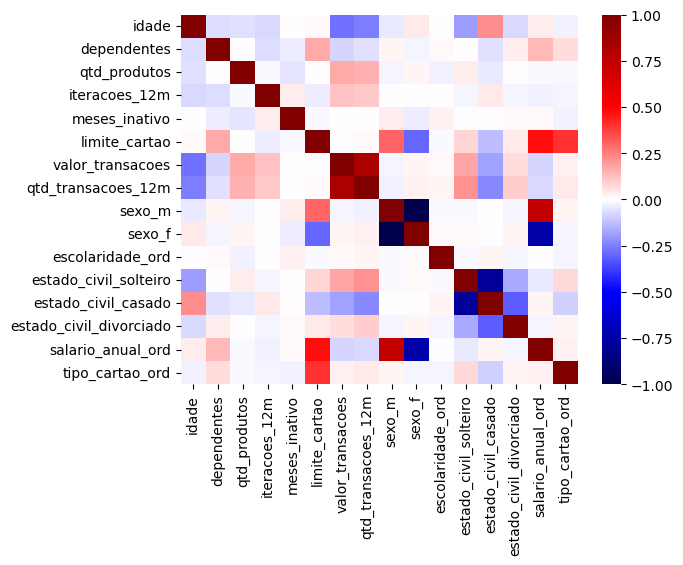

In [116]:
sns.heatmap(df.corr(), vmin=-1, cmap = 'seismic');

Agora, serão excluídas as variáveis `escolaridade_ord`, `qtd_produtos`, `meses_inativo`, `iteracoes_12m`, `estado_civil_divorciado`, `estado_civil_casado`, `estado_civil_solteiro`, `dependentes`, `idade` e `tipo_cartao_ord`, pois apresentaram apenas valores entre -0.5 e 0.5 de correlação.

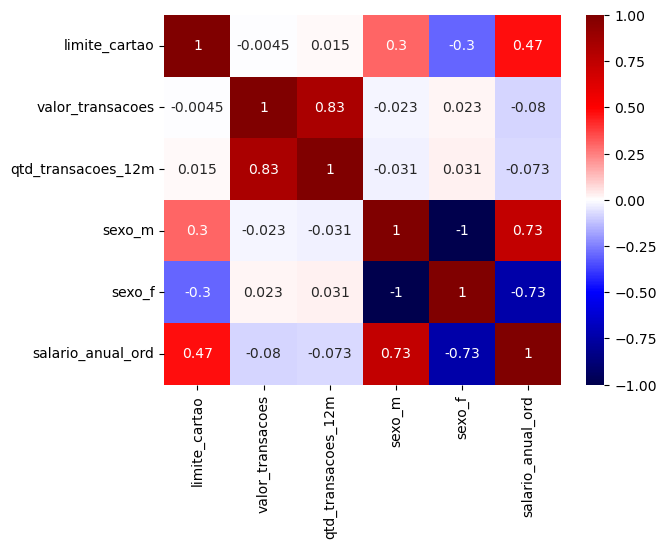

In [117]:
df2 = df.drop(columns=['escolaridade_ord', 
                       'meses_inativo', 
                       'iteracoes_12m',
                       'qtd_produtos',
                       'estado_civil_divorciado',
                      'estado_civil_casado',
                      'estado_civil_solteiro',
                      'dependentes',
                      'idade',
                      'tipo_cartao_ord'])

g = sns.heatmap(df2.corr(), vmin=-1, cmap = 'seismic', annot = True);


Resposta:

Outra variável notada foi o `limite_cartao` também possui uma correlação mediana com o `salário_anual` e o `sexo` conforme avaliado nas seções 2.2 e 6.2 e a Análise 14 a seguir.

Conforme o mapa de calor, as variáveis revelam pouca correlação entre si, exceto a `qtd_transacoes_12m` em relação ao `valor_transacoes`. Como esperado pela sua definição, há correlação direta entre a quantidade de transações e o valor da soma das transações.

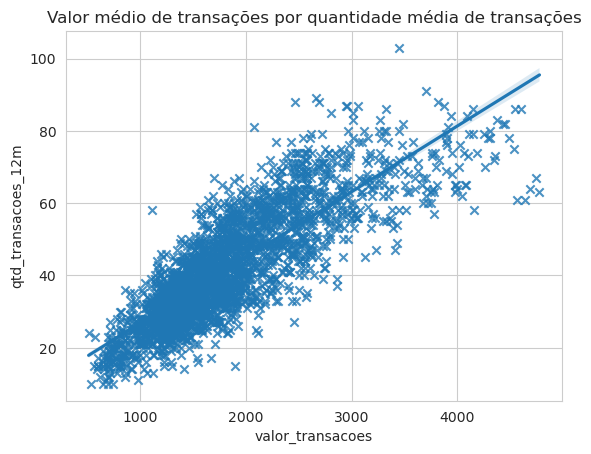

In [118]:
with sns.axes_style ('whitegrid'):
    g = sns.regplot(data = df,
                    x = 'valor_transacoes',
                    y = 'qtd_transacoes_12m',
                    marker = 'x');
    g.set(title = 'Valor médio de transações por quantidade média de transações')
    

## Análise 14. Limite por gênero e faixa salarial anual

Há diferença na disponibilização de limite de crédito por gênero e faixa salarial anual?

QUERY:
> SELECT sexo, salario_anual, MIN(limite_cartao) AS minimo_limite, AVG(limite_cartao) AS media_limite, MAX(limite_cartao) AS maximo_limite FROM credito GROUP BY (sexo, salario_anual);

In [119]:
analise2 = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_limite_cartao_porSexoeSalarioAnual.csv')
analise2['media_limite'] = np.round(analise2['media_limite'],2)
analise2.sort_values(by = ['sexo','media_limite'], ascending = True)


,sexo,salario_anual,minimo_limite,media_limite,maximo_limite
3,F,menos que $40K,1438.08,4212.20,15987.78
0,F,$40K - $60K,1438.03,4773.45,19482.96
6,M,menos que $40K,1438.07,3452.40,12609.78
5,M,$40K - $60K,1438.18,5753.31,23981.32
1,M,$60K - $80K,1438.26,9096.03,34516.98
2,M,$80K - $120K,1438.33,14886.56,34516.99
4,M,$120K +,1438.89,17801.49,34516.97


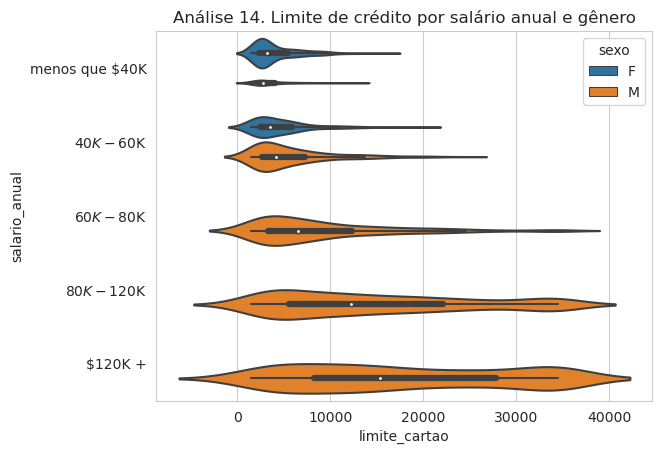

In [120]:
credito_df = credito_df[credito_df != 'na']

with sns.axes_style('whitegrid'):
    grafico14 = sns.violinplot(x = credito_df.limite_cartao, 
                          y = credito_df.salario_anual,
                            hue = credito_df.sexo,
                          scale = 'count',
                          order = ['menos que $40K',
                                           '$40K - $60K','$60K - $80K',
                                           '$80K - $120K','$120K +']
                         );
    grafico14.set_title('Análise 14. Limite de crédito por salário anual e gênero');

Resposta:

A tabela da Análise 14 revela a informação de que as mulheres recebem no máximo 60k dólares de salário anual, enquanto o limite máximo dos homens é de mais de 120k anuais. Isso justifica o porquê de a distribuição de limite de crédito médio entre as mulheres ser tão menor que os dos homens, mesmo elas tendo consumo mais elevado que eles.

A distribuição média de limite e o limite máximo de cartão são crescentes à medida que aumentam as faixas salariais, conforme o esperado.

Uma curiosidade é que as mulheres com salário anual menor que 40 mil dólares têm o limite médio cerca de 22% maior que o dos homens na mesma faixa salarial. O contrário ocorre na faixa salarial por ano entre 40 e 60 mil dólares anuais.


# Conclusões
 

As variáveis `escolaridade` (tópicos de 5 a 5.6), `qtd_produtos` (tópicos 1.3, 2.3, 3.3, 4.3 e 5.3) e `iteracoes_12m` (tópicos 1.4, 2.4, 3.4, 4.4, 5.4 e 6.4) analisadas extensivamente não apresentaram conclusões sobre padrões de consumo.

Ao avaliar `limite_cartao` (tópicos 4.2 e 7.2) e `meses_inativo` (tópicos 4.5 e 7.5) junto às variáveis `dependentes` e `tipo_cartao`, verificou-se que os clientes com maiores limites de cartão oferecidos (clientes com mais dependentes e/ou melhor categoria de cartão), ficam menos meses inativos.

A variável `estado_civil` (tópicos de 3 a 3.6) também não fornece muitas informações. Entretanto, diferentemente dos solteiros e dos divorciados, os clientes casados apresentam valores menores de `valor_transacoes`, `limite_cartao` e `qtd_transacoes_12m`.

Existe proporcionalidade direta entre `iteracoes_12m` e `meses_inativo`, exceto quando se distingue por `idade` (tópicos 1.4 e 1.5) pois nesse caso, é o inverso. Os clientes mais velhos possuem menos meses inativos e mais iterações anuais.

O mesmo ocorre com as variáveis `limite_cartao` e `valor_transacoes`, que apresentam proporcionalidade inversa nas análises comparando as categorias, exceto ao avaliar `idade` (tópicos 1.1 e 1.2).

## Perfis possuem maior potencial de consumo, mas relativamente adquirem poucos produtos e utilizam pouco cartão:
* Homens
* Clientes com 3 ou mais dependentes
* Clientes com salário anual acima de 80 mil dólares
* Clientes com cartão Platimun
Podendo ser necessário maiores investimentos em marketing.

## Perfis que merecem reavaliação de limite, pois têm maiores padrões de consumo:
* Mulheres
* Clientes com 2 ou menos dependentes
* Clientes com salário anual menor de 80 mil dólares
Também deve-se atentar que é necessário verificar o risco de endividamento de oferecer maiores limites a essas categorias.

## Perfis que apresentam baixa iteratividade:
* Clientes com 3 a 4 dependentes
* Clientes com doutorado
* Clientes com 60 a 80 mil dólares anuais
* Clientes com cartão platinum
Devendo-se avaliar estratégias para reduzir o "churn rate".